# Results for local code

In [28]:
import sys
print(sys.version)


3.10.1 (v3.10.1:2cd268a3a9, Dec  6 2021, 14:28:59) [Clang 13.0.0 (clang-1300.0.29.3)]


## 0. Load libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as st
import pickle
import seaborn as sns   

#%matplotlib inline

## 1. Initialize variables

In [30]:
recalculate_if_saved = True 
# repetitions = 26
repetitions = 13
number_of_updates = 150
algorithm_list = ['corrective', 'standard', 'preventive']
types_list = ['concurrent']
delay_list = ['1', '10', '100', '1000', '10000']
repetition_probability_list = ['0']
negation_probability_list = ['0', '5', '10', '20', '40', '80']
file_path = 'local/test/results_experiment_'
new_columns_metrics = ['inconsistencies', 
                       'messages_sent', 
                       'latency_per_operation', 
                       'overhead_data_structure', 
                       'overhead_per_message', 
                       'number_of_reconfigurations', 
                       'total_reconfiguration_time',
                       'result_algorithm',
                       'type',
                       'negation_probability',
                       'delay',
                       'repetition_probability',
                       'update']
file_path_images = '/images/seaborn/'
type_exp = 'concurrent'
current_directory = os.getcwd()
all_results = pd.DataFrame(columns=new_columns_metrics)

In [31]:
def save_all_dataframes_as_pickle(all_results):
    print('Saving....')
    current_directory = os.getcwd()
    path_results = '/saved_dataframes/'
    string_name = 'data_frame_'
    pickle.dump(all_results, open(current_directory + path_results + '/single_value/dataframe_data_all.p' , 'wb'))
    print('Saved!')

In [32]:
def calculate_values(all_results):    
    new_number = number_of_updates
    one_time_print = False
    for repetition_index in range(0, repetitions + 1):
        file_path = 'local/test/results_experiment_' + str(new_number)
        data = dict()
        data['update'] = number_of_updates * (repetition_index + 1)
        for delay in delay_list:
            data['delay'] = delay
            for repetition_probability in repetition_probability_list:
                data['repetition'] = repetition_probability
                for negation_probability in negation_probability_list:
                    data['negation'] = negation_probability
                    for algorithm in algorithm_list:
                        data['algorithm'] = algorithm
                        for alg_type in types_list:  
                            data['alg_type'] = alg_type
                            str_1 = 'result_algorithm_*' + algorithm + '*_type_*' + alg_type + '*_negationProbability_*' + str(negation_probability)
                            str_2 = '*_delay_*' + str(delay) + '.0*_repetitionProbability_*' + str(repetition_probability) + '*.csv'
                            file_name = str_1 + str_2
                            try:
                                result = pd.read_csv(file_path +'/' + file_name, encoding='utf-8', sep=r'\s*,\s*', header=0, engine='python')                                
                                result['result_algorithm'] = [algorithm]*len(result)
                                result['type'] = [alg_type]*len(result)
                                result['negation_probability'] = [str(negation_probability)]*len(result)
                                result['delay'] = [str(delay)]*len(result)
                                result['repetition_probability'] = [str(repetition_probability)]*len(result)
                                result['update'] = [str( data['update'])]*len(result)
                                
                                for index, row in result.iterrows():                                           
                                    all_results = all_results.append(row, ignore_index=True)                                      
                            except FileNotFoundError as e:
                                print(e)

        new_number += number_of_updates
    save_all_dataframes_as_pickle(all_results)
    return all_results

In [33]:
def load_values():
    print('Loading...')
    path_results = '/saved_dataframes/'
    current_directory = os.getcwd()
    loaded_data = pickle.load(open(current_directory + path_results + '/single_value/dataframe_data_all.p' , 'rb'))
    print('Loaded!')
    return loaded_data

In [34]:
if recalculate_if_saved:
    all_results = calculate_values(all_results)
else:
    all_results = load_values()
    
# all_results

Saving....
Saved!


## 2. Plot all metrics

### Plot overhead per message

In [35]:
metric = 'overhead_per_message'
type_exp = 'concurrent'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)


# data_neg_30_del_10 =  all_results[(all_results['negation_probability'] =='80')] 

# all_results = all_results[(all_results['result_algorithm'] =='standard') &  ] 


all_results.rename(columns={'result_algorithm':'Algorithm'}, inplace=True)



# print(data_neg_30_del_10.head())
# data_neg_30_del_10 =  all_results

# data_neg_30_del_10['overhead_per_message'] = data_neg_30_del_10['overhead_per_message'].div(1000.0).round(3) 
# data_neg_30_del_80['overhead_per_message'] = data_neg_30_del_80['overhead_per_message'].div(1000.0).round(3) 

# fig, ax = plt.subplots(figsize=(9,5))
# g = sns.lineplot(data=data_neg_30_del_10, x='update', y='overhead_per_message', ci='sd', hue='result_algorithm')
# g.set(ylabel='Overhead per Message (KB)')
# sns.despine()

# plt.savefig(string_name_png, format='png', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)
# plt.savefig(string_name_eps, format='pdf', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)

#### Ideal conditions

40425


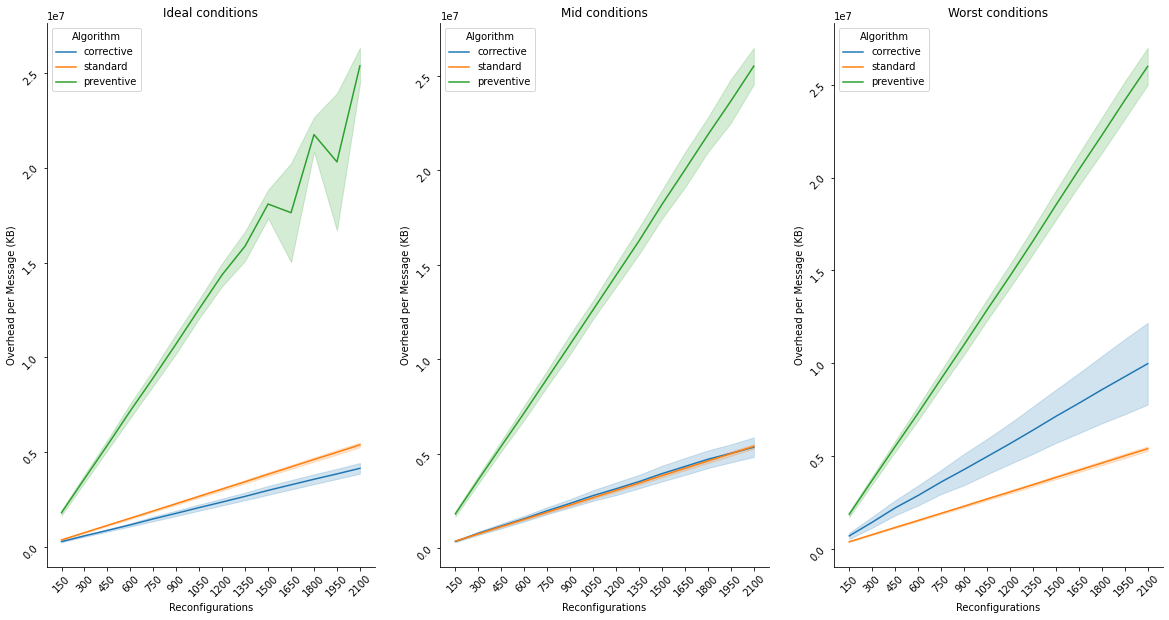

In [36]:
metric = 'overhead_per_message'
print(all_results.shape[0])
# ideal_results = all_results.loc[(all_results['negation_probability'].isin(['0','5'])) &                                     
#                                         (all_results['delay'].isin(['1','10']))]

# ideal_results = all_results.loc[(all_results['negation_probability'].isin(['0','5'])) ]

ideal_results = all_results.loc[(all_results['negation_probability'].isin(['0','5'])) &                                     
                                        (all_results['delay'].isin(['1','10']))]

# max_values = ideal_results.max()
# print(max_values)
# print('MINIMISOS')
# min_values = ideal_results.min()
# print(min_values)
# print('MAXIMOS')
# min_values = ideal_results.max(axis = 1)
# print(min_values)

mid_results = all_results.loc[(all_results['negation_probability'].isin(['10','20'])) &                                     
                                        (all_results['delay'].isin(['100','1000']))]

worst_results = all_results.loc[(all_results['negation_probability'].isin(['40','80'])) &                                     
                                        (all_results['delay'].isin(['10000','100000']))]

ideal_results['overhead_per_message'].div(1000.0).round(3) 
mid_results['overhead_per_message'].div(1000.0).round(3) 
worst_results['overhead_per_message'].div(1000.0).round(3) 


# fig, ax = plt.subplots(figsize=(20,10))
# g = sns.lineplot(data=ideal_results, x='update', y='overhead_per_message', ci='sd', hue='Algorithm')


fig, ax = plt.subplots(1, 3, figsize=(20,10))
g = sns.lineplot(ax=ax[0], data=ideal_results, x='update', y=metric, ci='sd', hue='Algorithm')
g2 = sns.lineplot(ax=ax[1], data=mid_results, x='update', y=metric, ci='sd', hue='Algorithm')
g3 = sns.lineplot(ax=ax[2], data=worst_results, x='update', y=metric, ci='sd', hue='Algorithm')

g.set(ylabel='Overhead per Message (KB)')
g2.set(ylabel='Overhead per Message (KB)')
g3.set(ylabel='Overhead per Message (KB)')

g.set(xlabel='Reconfigurations')
g2.set(xlabel='Reconfigurations')
g3.set(xlabel='Reconfigurations')

ax[0].tick_params(labelrotation=45)
ax[1].tick_params(labelrotation=45)
ax[2].tick_params(labelrotation=45)

ax[0].set_title('Ideal conditions')
ax[1].set_title('Mid conditions')
ax[2].set_title('Worst conditions')

sns.despine()

plt.savefig(string_name_png, format='png', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)
plt.savefig(string_name_eps, format='pdf', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)

40425


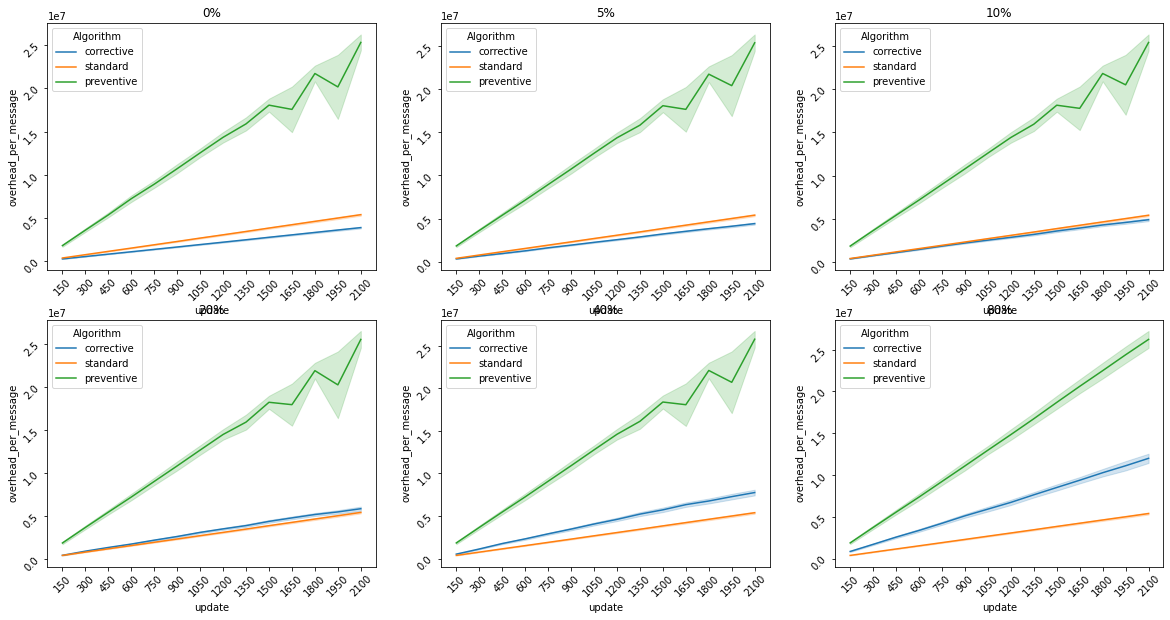

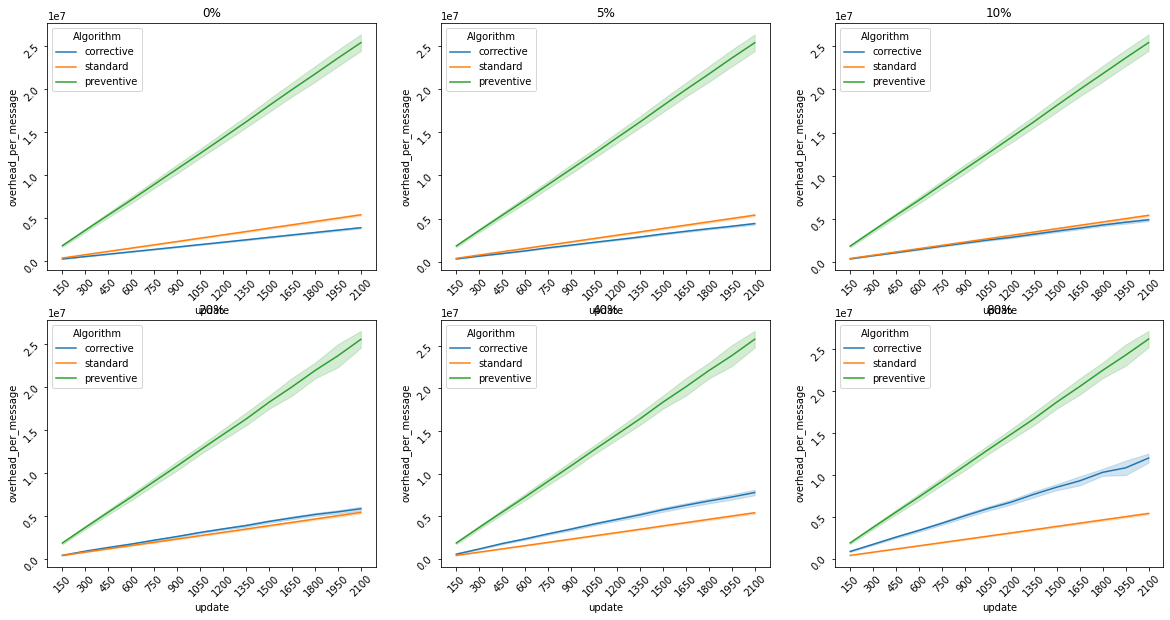

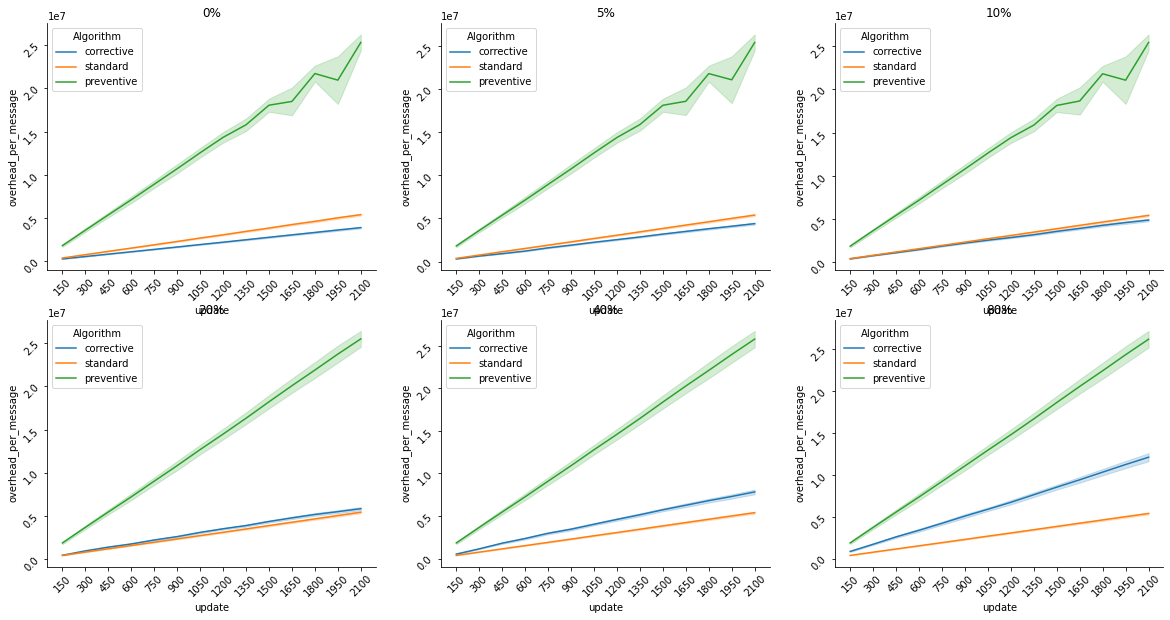

In [37]:
metric = 'overhead_per_message'
print(all_results.shape[0])

# ideal_results = all_results.loc[(all_results['delay'].isin(['1','10']))]

all_results['overhead_per_message'].div(1000.0).round(3) 

ideal_results_01 = all_results.loc[(all_results['delay'].isin(['1','10']))]

ideal_results_01_negation_00 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['0']))]
ideal_results_01_negation_05 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['5']))]
ideal_results_01_negation_10 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['10']))]
ideal_results_01_negation_20 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['20']))]
ideal_results_01_negation_40 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['40']))]
ideal_results_01_negation_80 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['80']))]

mid_results = all_results.loc[(all_results['delay'].isin(['100','1000']))]

mid_results_01_negation_00 = mid_results.loc[(mid_results['negation_probability'].isin(['0']))]
mid_results_01_negation_05 = mid_results.loc[(mid_results['negation_probability'].isin(['5']))]
mid_results_01_negation_10 = mid_results.loc[(mid_results['negation_probability'].isin(['10']))]
mid_results_01_negation_20 = mid_results.loc[(mid_results['negation_probability'].isin(['20']))]
mid_results_01_negation_40 = mid_results.loc[(mid_results['negation_probability'].isin(['40']))]
mid_results_01_negation_80 = mid_results.loc[(mid_results['negation_probability'].isin(['80']))]

worst_results = all_results.loc[(all_results['delay'].isin(['10000','100000']))]

worst_results_01_negation_00 = worst_results.loc[(worst_results['negation_probability'].isin(['0']))]
worst_results_01_negation_05 = worst_results.loc[(worst_results['negation_probability'].isin(['5']))]
worst_results_01_negation_10 = worst_results.loc[(worst_results['negation_probability'].isin(['10']))]
worst_results_01_negation_20 = worst_results.loc[(worst_results['negation_probability'].isin(['20']))]
worst_results_01_negation_40 = worst_results.loc[(worst_results['negation_probability'].isin(['40']))]
worst_results_01_negation_80 = worst_results.loc[(worst_results['negation_probability'].isin(['80']))]


ideal_results['overhead_per_message'].div(1000.0).round(3) 
mid_results['overhead_per_message'].div(1000.0).round(3) 
worst_results['overhead_per_message'].div(1000.0).round(3) 


# fig, ax = plt.subplots(figsize=(20,10))
# g = sns.lineplot(data=ideal_results, x='update', y='overhead_per_message', ci='sd', hue='Algorithm')

fig, ax = plt.subplots(2, 3, figsize=(20,10))
g_00_id = sns.lineplot(ax=ax[0,0], data=ideal_results_01_negation_00, x='update', y=metric, ci='sd', hue='Algorithm')
g_05_id = sns.lineplot(ax=ax[0,1], data=ideal_results_01_negation_05, x='update', y=metric, ci='sd', hue='Algorithm')
g_10_id = sns.lineplot(ax=ax[0,2], data=ideal_results_01_negation_10, x='update', y=metric, ci='sd', hue='Algorithm')
g_20_id = sns.lineplot(ax=ax[1,0], data=ideal_results_01_negation_20, x='update', y=metric, ci='sd', hue='Algorithm')
g_40_id = sns.lineplot(ax=ax[1,1], data=ideal_results_01_negation_40, x='update', y=metric, ci='sd', hue='Algorithm')
g_80_id = sns.lineplot(ax=ax[1,2], data=ideal_results_01_negation_80, x='update', y=metric, ci='sd', hue='Algorithm')

fig_mid, ax_mid = plt.subplots(2, 3, figsize=(20,10))
g_00_mid = sns.lineplot(ax=ax_mid[0,0], data=mid_results_01_negation_00, x='update', y=metric, ci='sd', hue='Algorithm')
g_05_mid = sns.lineplot(ax=ax_mid[0,1], data=mid_results_01_negation_05, x='update', y=metric, ci='sd', hue='Algorithm')
g_10_mid = sns.lineplot(ax=ax_mid[0,2], data=mid_results_01_negation_10, x='update', y=metric, ci='sd', hue='Algorithm')
g_20_mid = sns.lineplot(ax=ax_mid[1,0], data=mid_results_01_negation_20, x='update', y=metric, ci='sd', hue='Algorithm')
g_40_mid = sns.lineplot(ax=ax_mid[1,1], data=mid_results_01_negation_40, x='update', y=metric, ci='sd', hue='Algorithm')
g_80_mid = sns.lineplot(ax=ax_mid[1,2], data=mid_results_01_negation_80, x='update', y=metric, ci='sd', hue='Algorithm')

fig_worst, ax_worst = plt.subplots(2, 3, figsize=(20,10))
g_00_worst = sns.lineplot(ax=ax_worst[0,0], data=worst_results_01_negation_00, x='update', y=metric, ci='sd', hue='Algorithm')
g_05_worst = sns.lineplot(ax=ax_worst[0,1], data=worst_results_01_negation_05, x='update', y=metric, ci='sd', hue='Algorithm')
g_10_worst = sns.lineplot(ax=ax_worst[0,2], data=worst_results_01_negation_10, x='update', y=metric, ci='sd', hue='Algorithm')
g_20_worst = sns.lineplot(ax=ax_worst[1,0], data=worst_results_01_negation_20, x='update', y=metric, ci='sd', hue='Algorithm')
g_40_worst = sns.lineplot(ax=ax_worst[1,1], data=worst_results_01_negation_40, x='update', y=metric, ci='sd', hue='Algorithm')
g_80_worst = sns.lineplot(ax=ax_worst[1,2], data=worst_results_01_negation_80, x='update', y=metric, ci='sd', hue='Algorithm')


sns.despine()

# fig, ax = plt.subplots(1, 3, figsize=(20,10))
# g = sns.lineplot(ax=ax[0], data=ideal_results, x='update', y=metric, ci='sd', hue='Algorithm')
# g2 = sns.lineplot(ax=ax[1], data=mid_results, x='update', y=metric, ci='sd', hue='Algorithm')
# g3 = sns.lineplot(ax=ax[2], data=worst_results, x='update', y=metric, ci='sd', hue='Algorithm')

# g.set(ylabel='Overhead per Message (KB)')
# g2.set(ylabel='Overhead per Message (KB)')
# g3.set(ylabel='Overhead per Message (KB)')

# g.set(xlabel='Reconfigurations')
# g2.set(xlabel='Reconfigurations')
# g3.set(xlabel='Reconfigurations')

ax[0,0].tick_params(labelrotation=45)
ax[0,1].tick_params(labelrotation=45)
ax[0,2].tick_params(labelrotation=45)
ax[1,0].tick_params(labelrotation=45)
ax[1,1].tick_params(labelrotation=45)
ax[1,2].tick_params(labelrotation=45)

ax[0,0].set_title('0%')
ax[0,1].set_title('5%')
ax[0,2].set_title('10%')
ax[1,0].set_title('20%')
ax[1,1].set_title('40%')
ax[1,2].set_title('80%')

ax_mid[0,0].tick_params(labelrotation=45)
ax_mid[0,1].tick_params(labelrotation=45)
ax_mid[0,2].tick_params(labelrotation=45)
ax_mid[1,0].tick_params(labelrotation=45)
ax_mid[1,1].tick_params(labelrotation=45)
ax_mid[1,2].tick_params(labelrotation=45)

ax_mid[0,0].set_title('0%')
ax_mid[0,1].set_title('5%')
ax_mid[0,2].set_title('10%')
ax_mid[1,0].set_title('20%')
ax_mid[1,1].set_title('40%')
ax_mid[1,2].set_title('80%')

ax_worst[0,0].tick_params(labelrotation=45)
ax_worst[0,1].tick_params(labelrotation=45)
ax_worst[0,2].tick_params(labelrotation=45)
ax_worst[1,0].tick_params(labelrotation=45)
ax_worst[1,1].tick_params(labelrotation=45)
ax_worst[1,2].tick_params(labelrotation=45)

ax_worst[0,0].set_title('0%')
ax_worst[0,1].set_title('5%')
ax_worst[0,2].set_title('10%')
ax_worst[1,0].set_title('20%')
ax_worst[1,1].set_title('40%')
ax_worst[1,2].set_title('80%')


sns.despine()

# # plt.savefig(string_name_png, format='png', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)
# # plt.savefig(string_name_eps, format='pdf', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)

### Plot messages sent

In [38]:
metric = 'messages_sent'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)


# # data_neg_30_del_10 =  all_results[(all_results['negation_probability'] =='30')] 
# data_neg_30_del_10 =  all_results


# fig, ax = plt.subplots(figsize=(9,5))
# g = sns.lineplot(data=data_neg_30_del_10, x="update", y="messages_sent", ci='sd', hue="result_algorithm")
# g.set(ylabel='Messages sent')
# sns.despine()

# plt.savefig(string_name_png, format='png', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)
# plt.savefig(string_name_eps, format='pdf', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)

#### Ideal conditions

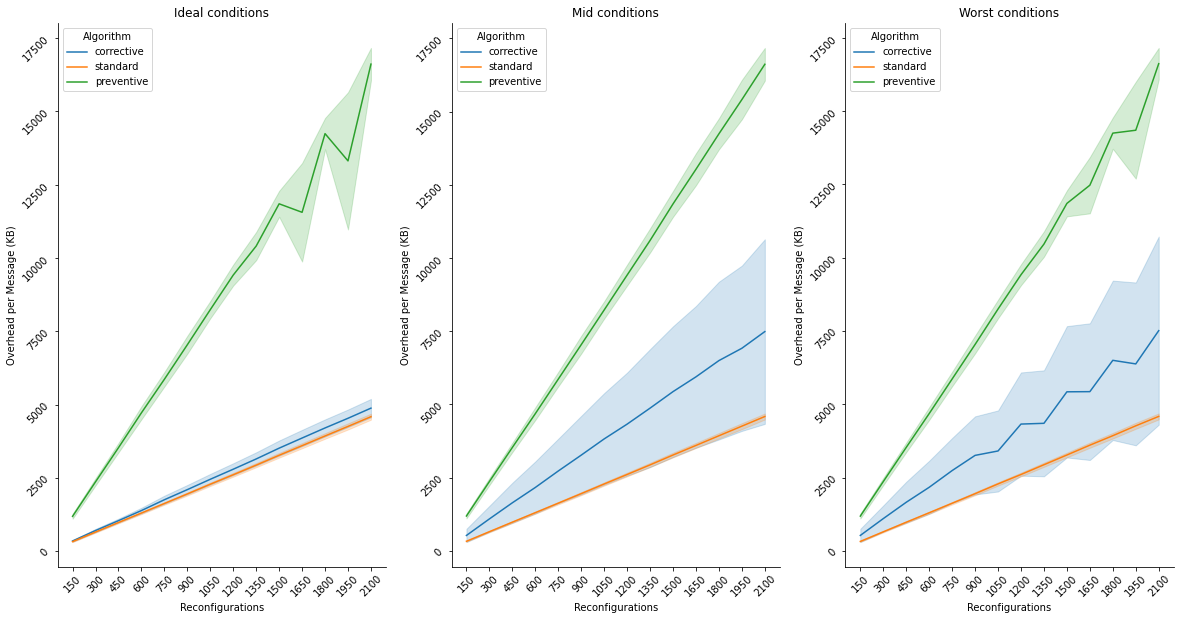

In [39]:
# fig, ax = plt.subplots(figsize=(20,10))
# g = sns.lineplot(data=ideal_results, x='update', y='messages_sent', ci='sd', hue='Algorithm')
metric = 'messages_sent'


fig, ax = plt.subplots(1, 3, figsize=(20,10))
g = sns.lineplot(ax=ax[0], data=ideal_results, x='update', y=metric, ci='sd', hue='Algorithm')
g2 = sns.lineplot(ax=ax[1], data=mid_results, x='update', y=metric, ci='sd', hue='Algorithm')
g3 = sns.lineplot(ax=ax[2], data=worst_results, x='update', y=metric, ci='sd', hue='Algorithm')

g.set(ylabel='Overhead per Message (KB)')
g2.set(ylabel='Overhead per Message (KB)')
g3.set(ylabel='Overhead per Message (KB)')

g.set(xlabel='Reconfigurations')
g2.set(xlabel='Reconfigurations')
g3.set(xlabel='Reconfigurations')

ax[0].tick_params(labelrotation=45)
ax[1].tick_params(labelrotation=45)
ax[2].tick_params(labelrotation=45)

ax[0].set_title('Ideal conditions')
ax[1].set_title('Mid conditions')
ax[2].set_title('Worst conditions')

sns.despine()

plt.savefig(string_name_png, format='png', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)
plt.savefig(string_name_eps, format='pdf', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)

40425


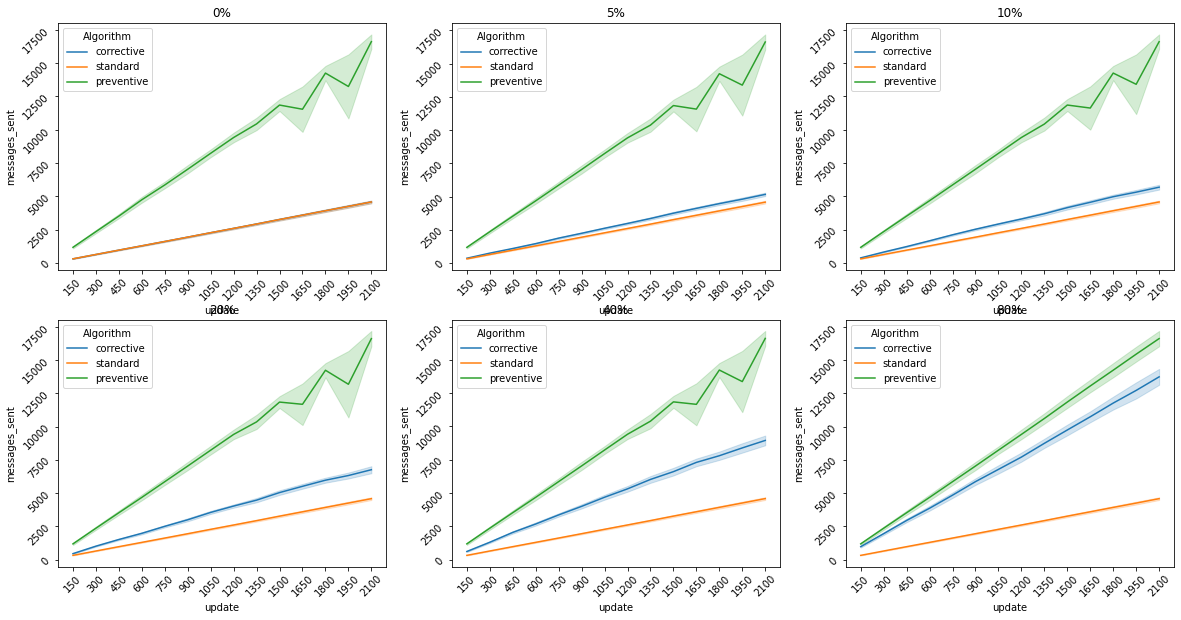

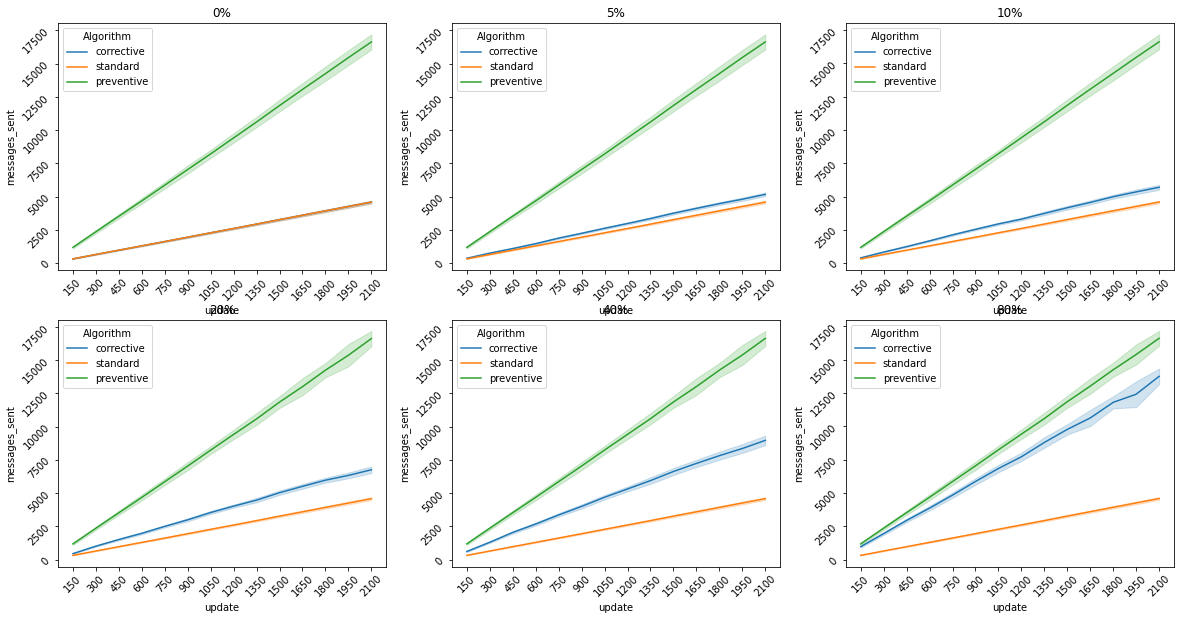

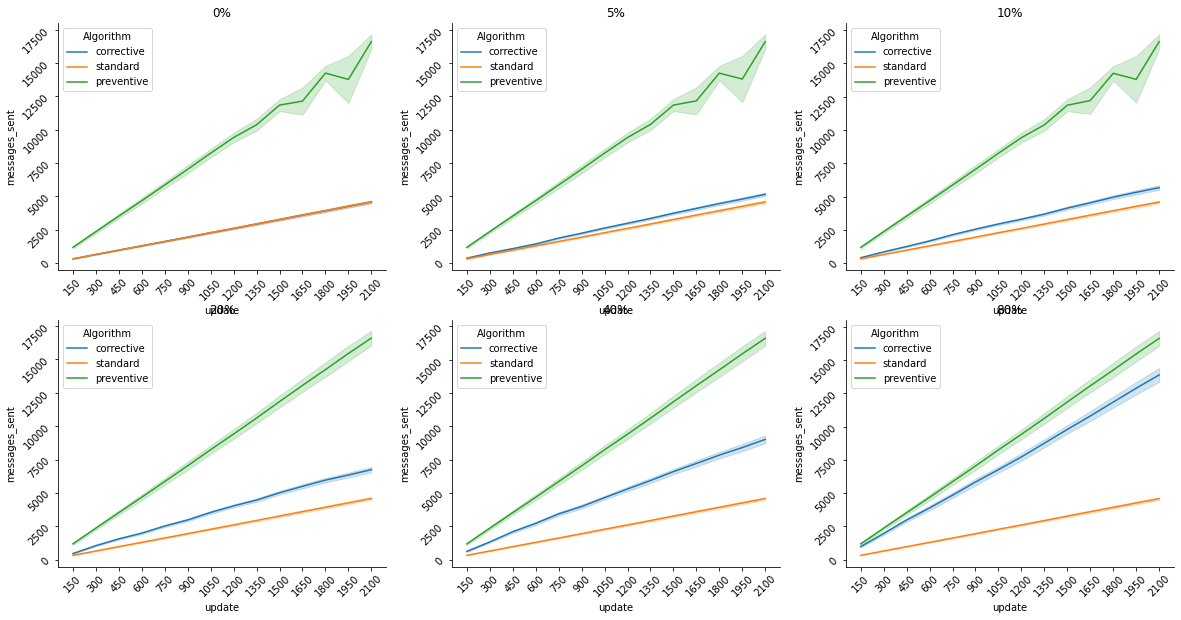

In [40]:
metric = 'messages_sent'
print(all_results.shape[0])

# ideal_results = all_results.loc[(all_results['delay'].isin(['1','10']))]

all_results['overhead_per_message'].div(1000.0).round(3) 

ideal_results_01 = all_results.loc[(all_results['delay'].isin(['1','10']))]

ideal_results_01_negation_00 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['0']))]
ideal_results_01_negation_05 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['5']))]
ideal_results_01_negation_10 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['10']))]
ideal_results_01_negation_20 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['20']))]
ideal_results_01_negation_40 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['40']))]
ideal_results_01_negation_80 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['80']))]

mid_results = all_results.loc[(all_results['delay'].isin(['100','1000']))]

mid_results_01_negation_00 = mid_results.loc[(mid_results['negation_probability'].isin(['0']))]
mid_results_01_negation_05 = mid_results.loc[(mid_results['negation_probability'].isin(['5']))]
mid_results_01_negation_10 = mid_results.loc[(mid_results['negation_probability'].isin(['10']))]
mid_results_01_negation_20 = mid_results.loc[(mid_results['negation_probability'].isin(['20']))]
mid_results_01_negation_40 = mid_results.loc[(mid_results['negation_probability'].isin(['40']))]
mid_results_01_negation_80 = mid_results.loc[(mid_results['negation_probability'].isin(['80']))]

worst_results = all_results.loc[(all_results['delay'].isin(['10000','100000']))]

worst_results_01_negation_00 = worst_results.loc[(worst_results['negation_probability'].isin(['0']))]
worst_results_01_negation_05 = worst_results.loc[(worst_results['negation_probability'].isin(['5']))]
worst_results_01_negation_10 = worst_results.loc[(worst_results['negation_probability'].isin(['10']))]
worst_results_01_negation_20 = worst_results.loc[(worst_results['negation_probability'].isin(['20']))]
worst_results_01_negation_40 = worst_results.loc[(worst_results['negation_probability'].isin(['40']))]
worst_results_01_negation_80 = worst_results.loc[(worst_results['negation_probability'].isin(['80']))]


ideal_results['overhead_per_message'].div(1000.0).round(3) 
mid_results['overhead_per_message'].div(1000.0).round(3) 
worst_results['overhead_per_message'].div(1000.0).round(3) 


# fig, ax = plt.subplots(figsize=(20,10))
# g = sns.lineplot(data=ideal_results, x='update', y='overhead_per_message', ci='sd', hue='Algorithm')

fig, ax = plt.subplots(2, 3, figsize=(20,10))
g_00_id = sns.lineplot(ax=ax[0,0], data=ideal_results_01_negation_00, x='update', y=metric, ci='sd', hue='Algorithm')
g_05_id = sns.lineplot(ax=ax[0,1], data=ideal_results_01_negation_05, x='update', y=metric, ci='sd', hue='Algorithm')
g_10_id = sns.lineplot(ax=ax[0,2], data=ideal_results_01_negation_10, x='update', y=metric, ci='sd', hue='Algorithm')
g_20_id = sns.lineplot(ax=ax[1,0], data=ideal_results_01_negation_20, x='update', y=metric, ci='sd', hue='Algorithm')
g_40_id = sns.lineplot(ax=ax[1,1], data=ideal_results_01_negation_40, x='update', y=metric, ci='sd', hue='Algorithm')
g_80_id = sns.lineplot(ax=ax[1,2], data=ideal_results_01_negation_80, x='update', y=metric, ci='sd', hue='Algorithm')

fig_mid, ax_mid = plt.subplots(2, 3, figsize=(20,10))
g_00_mid = sns.lineplot(ax=ax_mid[0,0], data=mid_results_01_negation_00, x='update', y=metric, ci='sd', hue='Algorithm')
g_05_mid = sns.lineplot(ax=ax_mid[0,1], data=mid_results_01_negation_05, x='update', y=metric, ci='sd', hue='Algorithm')
g_10_mid = sns.lineplot(ax=ax_mid[0,2], data=mid_results_01_negation_10, x='update', y=metric, ci='sd', hue='Algorithm')
g_20_mid = sns.lineplot(ax=ax_mid[1,0], data=mid_results_01_negation_20, x='update', y=metric, ci='sd', hue='Algorithm')
g_40_mid = sns.lineplot(ax=ax_mid[1,1], data=mid_results_01_negation_40, x='update', y=metric, ci='sd', hue='Algorithm')
g_80_mid = sns.lineplot(ax=ax_mid[1,2], data=mid_results_01_negation_80, x='update', y=metric, ci='sd', hue='Algorithm')

fig_worst, ax_worst = plt.subplots(2, 3, figsize=(20,10))
g_00_worst = sns.lineplot(ax=ax_worst[0,0], data=worst_results_01_negation_00, x='update', y=metric, ci='sd', hue='Algorithm')
g_05_worst = sns.lineplot(ax=ax_worst[0,1], data=worst_results_01_negation_05, x='update', y=metric, ci='sd', hue='Algorithm')
g_10_worst = sns.lineplot(ax=ax_worst[0,2], data=worst_results_01_negation_10, x='update', y=metric, ci='sd', hue='Algorithm')
g_20_worst = sns.lineplot(ax=ax_worst[1,0], data=worst_results_01_negation_20, x='update', y=metric, ci='sd', hue='Algorithm')
g_40_worst = sns.lineplot(ax=ax_worst[1,1], data=worst_results_01_negation_40, x='update', y=metric, ci='sd', hue='Algorithm')
g_80_worst = sns.lineplot(ax=ax_worst[1,2], data=worst_results_01_negation_80, x='update', y=metric, ci='sd', hue='Algorithm')


sns.despine()

# fig, ax = plt.subplots(1, 3, figsize=(20,10))
# g = sns.lineplot(ax=ax[0], data=ideal_results, x='update', y=metric, ci='sd', hue='Algorithm')
# g2 = sns.lineplot(ax=ax[1], data=mid_results, x='update', y=metric, ci='sd', hue='Algorithm')
# g3 = sns.lineplot(ax=ax[2], data=worst_results, x='update', y=metric, ci='sd', hue='Algorithm')

# g.set(ylabel='Overhead per Message (KB)')
# g2.set(ylabel='Overhead per Message (KB)')
# g3.set(ylabel='Overhead per Message (KB)')

# g.set(xlabel='Reconfigurations')
# g2.set(xlabel='Reconfigurations')
# g3.set(xlabel='Reconfigurations')

ax[0,0].tick_params(labelrotation=45)
ax[0,1].tick_params(labelrotation=45)
ax[0,2].tick_params(labelrotation=45)
ax[1,0].tick_params(labelrotation=45)
ax[1,1].tick_params(labelrotation=45)
ax[1,2].tick_params(labelrotation=45)

ax[0,0].set_title('0%')
ax[0,1].set_title('5%')
ax[0,2].set_title('10%')
ax[1,0].set_title('20%')
ax[1,1].set_title('40%')
ax[1,2].set_title('80%')

ax_mid[0,0].tick_params(labelrotation=45)
ax_mid[0,1].tick_params(labelrotation=45)
ax_mid[0,2].tick_params(labelrotation=45)
ax_mid[1,0].tick_params(labelrotation=45)
ax_mid[1,1].tick_params(labelrotation=45)
ax_mid[1,2].tick_params(labelrotation=45)

ax_mid[0,0].set_title('0%')
ax_mid[0,1].set_title('5%')
ax_mid[0,2].set_title('10%')
ax_mid[1,0].set_title('20%')
ax_mid[1,1].set_title('40%')
ax_mid[1,2].set_title('80%')

ax_worst[0,0].tick_params(labelrotation=45)
ax_worst[0,1].tick_params(labelrotation=45)
ax_worst[0,2].tick_params(labelrotation=45)
ax_worst[1,0].tick_params(labelrotation=45)
ax_worst[1,1].tick_params(labelrotation=45)
ax_worst[1,2].tick_params(labelrotation=45)

ax_worst[0,0].set_title('0%')
ax_worst[0,1].set_title('5%')
ax_worst[0,2].set_title('10%')
ax_worst[1,0].set_title('20%')
ax_worst[1,1].set_title('40%')
ax_worst[1,2].set_title('80%')


sns.despine()

# # plt.savefig(string_name_png, format='png', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)
# # plt.savefig(string_name_eps, format='pdf', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)

### Plot Overhead Data Structure

In [41]:
metric = 'overhead_data_structure'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)

# # data_neg_30_del_10 =  all_results[(all_results['negation_probability'] =='30')] 
# data_neg_30_del_10 =  all_results

# data_neg_30_del_10[metric] = data_neg_30_del_10[metric].div(1000.0).round(3) 



# fig, ax = plt.subplots(figsize=(9,5))
# g = sns.lineplot(data=data_neg_30_del_10, x="update", y=metric, ci='sd', hue="result_algorithm")

# g.set(ylabel='Overhead Data Structure (KB)')
# sns.despine()

# plt.savefig(string_name_png, format='png', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)
# plt.savefig(string_name_eps, format='pdf', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)

#### Ideal conditions

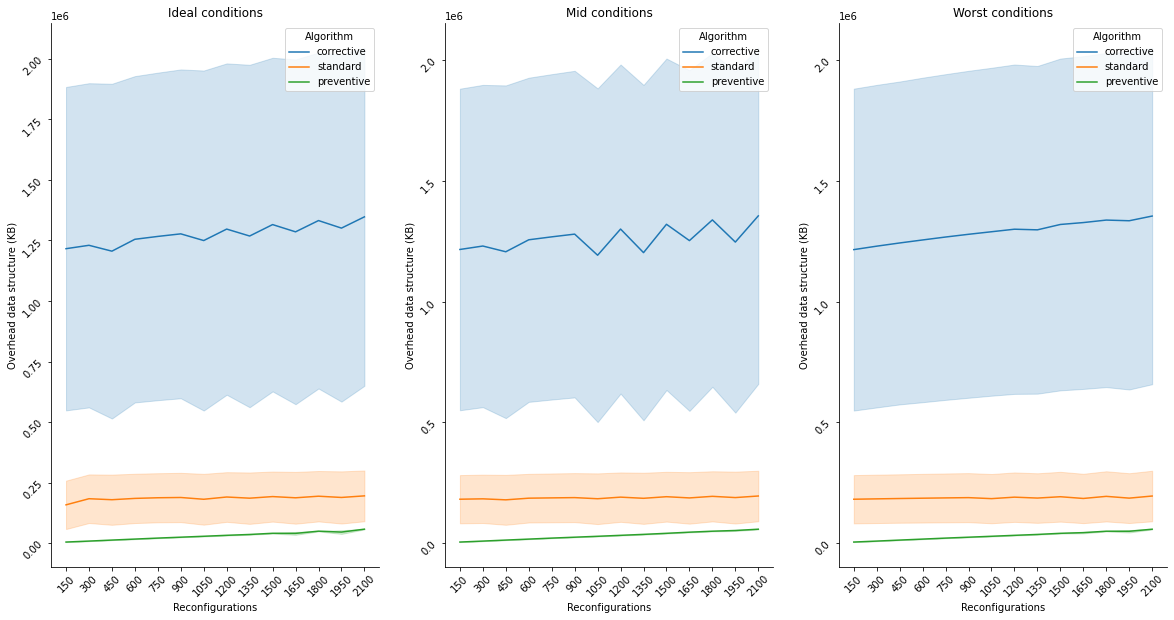

In [42]:
metric = 'overhead_data_structure'
# fig, ax = plt.subplots(figsize=(20,10))
# g = sns.lineplot(data=ideal_results, x='update', y=metric, ci='sd', hue='Algorithm')

ideal_results[metric].div(1000.0).round(3) 
mid_results[metric].div(1000.0).round(3) 
worst_results[metric].div(1000.0).round(3) 


fig, ax = plt.subplots(1, 3, figsize=(20,10))
g = sns.lineplot(ax=ax[0], data=ideal_results, x='update', y=metric, ci='sd', hue='Algorithm')
g2 = sns.lineplot(ax=ax[1], data=mid_results, x='update', y=metric, ci='sd', hue='Algorithm')
g3 = sns.lineplot(ax=ax[2], data=worst_results, x='update', y=metric, ci='sd', hue='Algorithm')

g.set(ylabel='Overhead data structure (KB)')
g2.set(ylabel='Overhead data structure (KB)')
g3.set(ylabel='Overhead data structure (KB)')

g.set(xlabel='Reconfigurations')
g2.set(xlabel='Reconfigurations')
g3.set(xlabel='Reconfigurations')

ax[0].tick_params(labelrotation=45)
ax[1].tick_params(labelrotation=45)
ax[2].tick_params(labelrotation=45)

ax[0].set_title('Ideal conditions')
ax[1].set_title('Mid conditions')
ax[2].set_title('Worst conditions')

sns.despine()

plt.savefig(string_name_png, format='png', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)
plt.savefig(string_name_eps, format='pdf', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)

40425


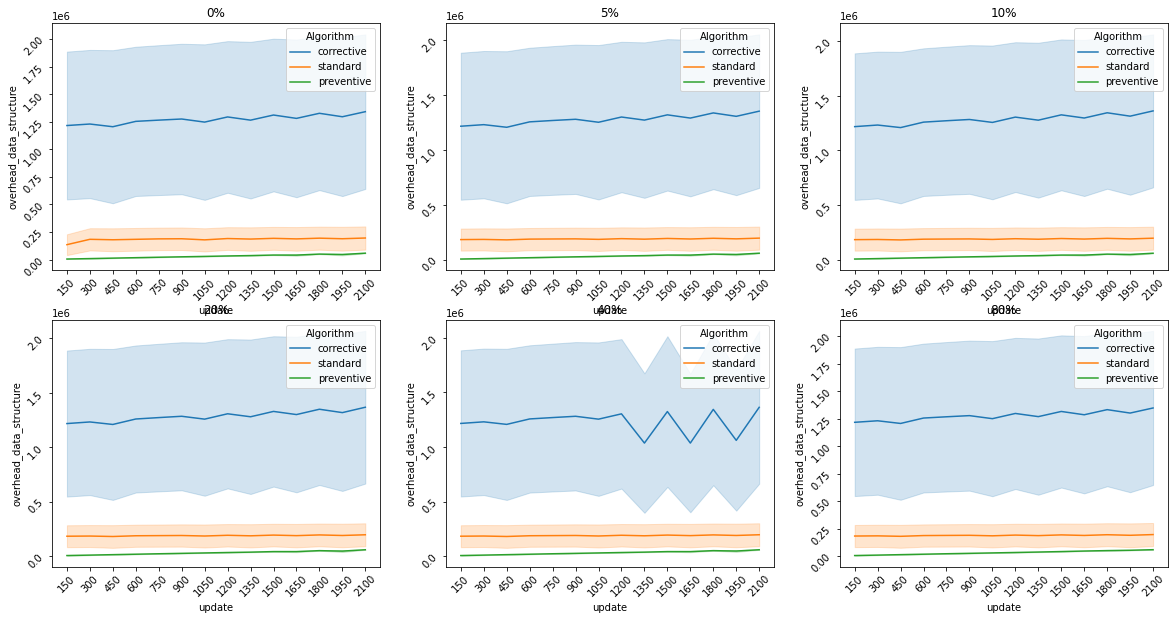

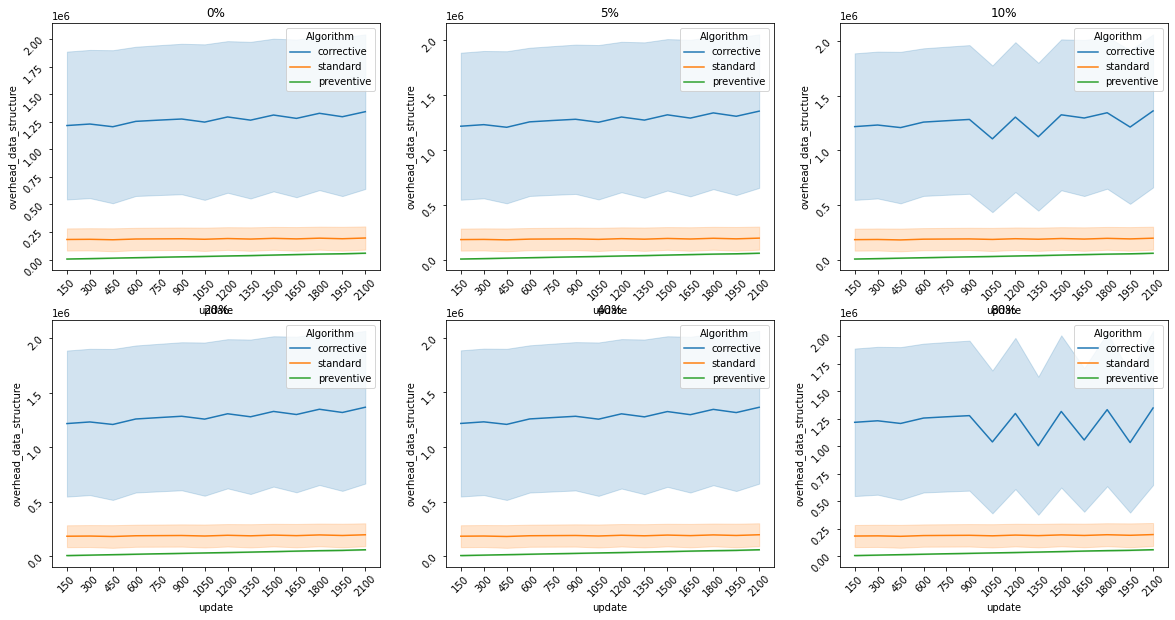

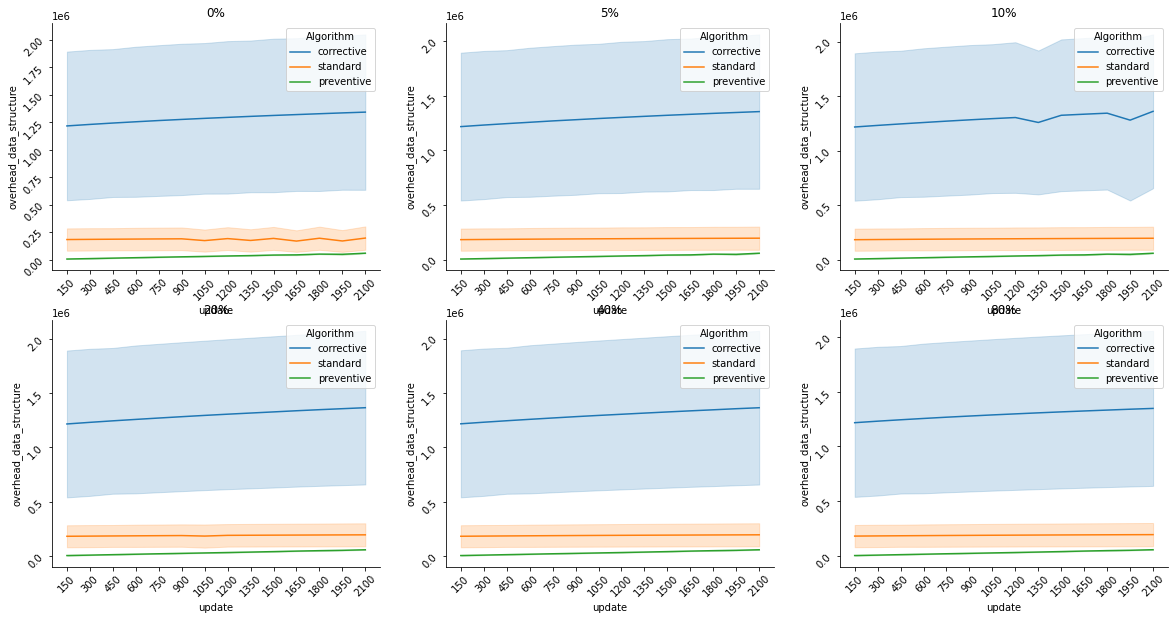

In [43]:
metric = 'overhead_data_structure'
print(all_results.shape[0])

# ideal_results = all_results.loc[(all_results['delay'].isin(['1','10']))]

all_results['overhead_per_message'].div(1000.0).round(3) 

ideal_results_01 = all_results.loc[(all_results['delay'].isin(['1','10']))]

ideal_results_01_negation_00 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['0']))]
ideal_results_01_negation_05 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['5']))]
ideal_results_01_negation_10 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['10']))]
ideal_results_01_negation_20 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['20']))]
ideal_results_01_negation_40 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['40']))]
ideal_results_01_negation_80 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['80']))]

mid_results = all_results.loc[(all_results['delay'].isin(['100','1000']))]

mid_results_01_negation_00 = mid_results.loc[(mid_results['negation_probability'].isin(['0']))]
mid_results_01_negation_05 = mid_results.loc[(mid_results['negation_probability'].isin(['5']))]
mid_results_01_negation_10 = mid_results.loc[(mid_results['negation_probability'].isin(['10']))]
mid_results_01_negation_20 = mid_results.loc[(mid_results['negation_probability'].isin(['20']))]
mid_results_01_negation_40 = mid_results.loc[(mid_results['negation_probability'].isin(['40']))]
mid_results_01_negation_80 = mid_results.loc[(mid_results['negation_probability'].isin(['80']))]

worst_results = all_results.loc[(all_results['delay'].isin(['10000','100000']))]

worst_results_01_negation_00 = worst_results.loc[(worst_results['negation_probability'].isin(['0']))]
worst_results_01_negation_05 = worst_results.loc[(worst_results['negation_probability'].isin(['5']))]
worst_results_01_negation_10 = worst_results.loc[(worst_results['negation_probability'].isin(['10']))]
worst_results_01_negation_20 = worst_results.loc[(worst_results['negation_probability'].isin(['20']))]
worst_results_01_negation_40 = worst_results.loc[(worst_results['negation_probability'].isin(['40']))]
worst_results_01_negation_80 = worst_results.loc[(worst_results['negation_probability'].isin(['80']))]


ideal_results['overhead_per_message'].div(1000.0).round(3) 
mid_results['overhead_per_message'].div(1000.0).round(3) 
worst_results['overhead_per_message'].div(1000.0).round(3) 


# fig, ax = plt.subplots(figsize=(20,10))
# g = sns.lineplot(data=ideal_results, x='update', y='overhead_per_message', ci='sd', hue='Algorithm')

fig, ax = plt.subplots(2, 3, figsize=(20,10))
g_00_id = sns.lineplot(ax=ax[0,0], data=ideal_results_01_negation_00, x='update', y=metric, ci='sd', hue='Algorithm')
g_05_id = sns.lineplot(ax=ax[0,1], data=ideal_results_01_negation_05, x='update', y=metric, ci='sd', hue='Algorithm')
g_10_id = sns.lineplot(ax=ax[0,2], data=ideal_results_01_negation_10, x='update', y=metric, ci='sd', hue='Algorithm')
g_20_id = sns.lineplot(ax=ax[1,0], data=ideal_results_01_negation_20, x='update', y=metric, ci='sd', hue='Algorithm')
g_40_id = sns.lineplot(ax=ax[1,1], data=ideal_results_01_negation_40, x='update', y=metric, ci='sd', hue='Algorithm')
g_80_id = sns.lineplot(ax=ax[1,2], data=ideal_results_01_negation_80, x='update', y=metric, ci='sd', hue='Algorithm')

fig_mid, ax_mid = plt.subplots(2, 3, figsize=(20,10))
g_00_mid = sns.lineplot(ax=ax_mid[0,0], data=mid_results_01_negation_00, x='update', y=metric, ci='sd', hue='Algorithm')
g_05_mid = sns.lineplot(ax=ax_mid[0,1], data=mid_results_01_negation_05, x='update', y=metric, ci='sd', hue='Algorithm')
g_10_mid = sns.lineplot(ax=ax_mid[0,2], data=mid_results_01_negation_10, x='update', y=metric, ci='sd', hue='Algorithm')
g_20_mid = sns.lineplot(ax=ax_mid[1,0], data=mid_results_01_negation_20, x='update', y=metric, ci='sd', hue='Algorithm')
g_40_mid = sns.lineplot(ax=ax_mid[1,1], data=mid_results_01_negation_40, x='update', y=metric, ci='sd', hue='Algorithm')
g_80_mid = sns.lineplot(ax=ax_mid[1,2], data=mid_results_01_negation_80, x='update', y=metric, ci='sd', hue='Algorithm')

fig_worst, ax_worst = plt.subplots(2, 3, figsize=(20,10))
g_00_worst = sns.lineplot(ax=ax_worst[0,0], data=worst_results_01_negation_00, x='update', y=metric, ci='sd', hue='Algorithm')
g_05_worst = sns.lineplot(ax=ax_worst[0,1], data=worst_results_01_negation_05, x='update', y=metric, ci='sd', hue='Algorithm')
g_10_worst = sns.lineplot(ax=ax_worst[0,2], data=worst_results_01_negation_10, x='update', y=metric, ci='sd', hue='Algorithm')
g_20_worst = sns.lineplot(ax=ax_worst[1,0], data=worst_results_01_negation_20, x='update', y=metric, ci='sd', hue='Algorithm')
g_40_worst = sns.lineplot(ax=ax_worst[1,1], data=worst_results_01_negation_40, x='update', y=metric, ci='sd', hue='Algorithm')
g_80_worst = sns.lineplot(ax=ax_worst[1,2], data=worst_results_01_negation_80, x='update', y=metric, ci='sd', hue='Algorithm')


sns.despine()

# fig, ax = plt.subplots(1, 3, figsize=(20,10))
# g = sns.lineplot(ax=ax[0], data=ideal_results, x='update', y=metric, ci='sd', hue='Algorithm')
# g2 = sns.lineplot(ax=ax[1], data=mid_results, x='update', y=metric, ci='sd', hue='Algorithm')
# g3 = sns.lineplot(ax=ax[2], data=worst_results, x='update', y=metric, ci='sd', hue='Algorithm')

# g.set(ylabel='Overhead per Message (KB)')
# g2.set(ylabel='Overhead per Message (KB)')
# g3.set(ylabel='Overhead per Message (KB)')

# g.set(xlabel='Reconfigurations')
# g2.set(xlabel='Reconfigurations')
# g3.set(xlabel='Reconfigurations')

ax[0,0].tick_params(labelrotation=45)
ax[0,1].tick_params(labelrotation=45)
ax[0,2].tick_params(labelrotation=45)
ax[1,0].tick_params(labelrotation=45)
ax[1,1].tick_params(labelrotation=45)
ax[1,2].tick_params(labelrotation=45)

ax[0,0].set_title('0%')
ax[0,1].set_title('5%')
ax[0,2].set_title('10%')
ax[1,0].set_title('20%')
ax[1,1].set_title('40%')
ax[1,2].set_title('80%')

ax_mid[0,0].tick_params(labelrotation=45)
ax_mid[0,1].tick_params(labelrotation=45)
ax_mid[0,2].tick_params(labelrotation=45)
ax_mid[1,0].tick_params(labelrotation=45)
ax_mid[1,1].tick_params(labelrotation=45)
ax_mid[1,2].tick_params(labelrotation=45)

ax_mid[0,0].set_title('0%')
ax_mid[0,1].set_title('5%')
ax_mid[0,2].set_title('10%')
ax_mid[1,0].set_title('20%')
ax_mid[1,1].set_title('40%')
ax_mid[1,2].set_title('80%')

ax_worst[0,0].tick_params(labelrotation=45)
ax_worst[0,1].tick_params(labelrotation=45)
ax_worst[0,2].tick_params(labelrotation=45)
ax_worst[1,0].tick_params(labelrotation=45)
ax_worst[1,1].tick_params(labelrotation=45)
ax_worst[1,2].tick_params(labelrotation=45)

ax_worst[0,0].set_title('0%')
ax_worst[0,1].set_title('5%')
ax_worst[0,2].set_title('10%')
ax_worst[1,0].set_title('20%')
ax_worst[1,1].set_title('40%')
ax_worst[1,2].set_title('80%')


sns.despine()

# # plt.savefig(string_name_png, format='png', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)
# # plt.savefig(string_name_eps, format='pdf', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)

### Plot Latency per Operation

In [44]:
metric = 'latency_per_operation'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)

# # data_neg_30_del_10 =  all_results[(all_results['negation_probability'] =='30')] 
# data_neg_30_del_10 =  all_results

# # display(data_neg_30_del_10.head(10))
# #  mean_vector = mean_vector / (number_of_updates * (repetition_index + 1))  

# data_neg_30_del_10['update'] = data_neg_30_del_10['update'].astype('float')

# data_neg_30_del_10[metric] = data_neg_30_del_10[metric].div(data_neg_30_del_10['update'])

# fig, ax = plt.subplots(figsize=(9,5))
# g = sns.lineplot(data=data_neg_30_del_10, x="update", y=metric, ci='sd', hue="result_algorithm")
# g.set(ylabel='Average Latency per Operation (s)')

# sns.despine()

# plt.savefig(string_name_png, format='png', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)
# plt.savefig(string_name_eps, format='pdf', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)

#### Ideal conditions

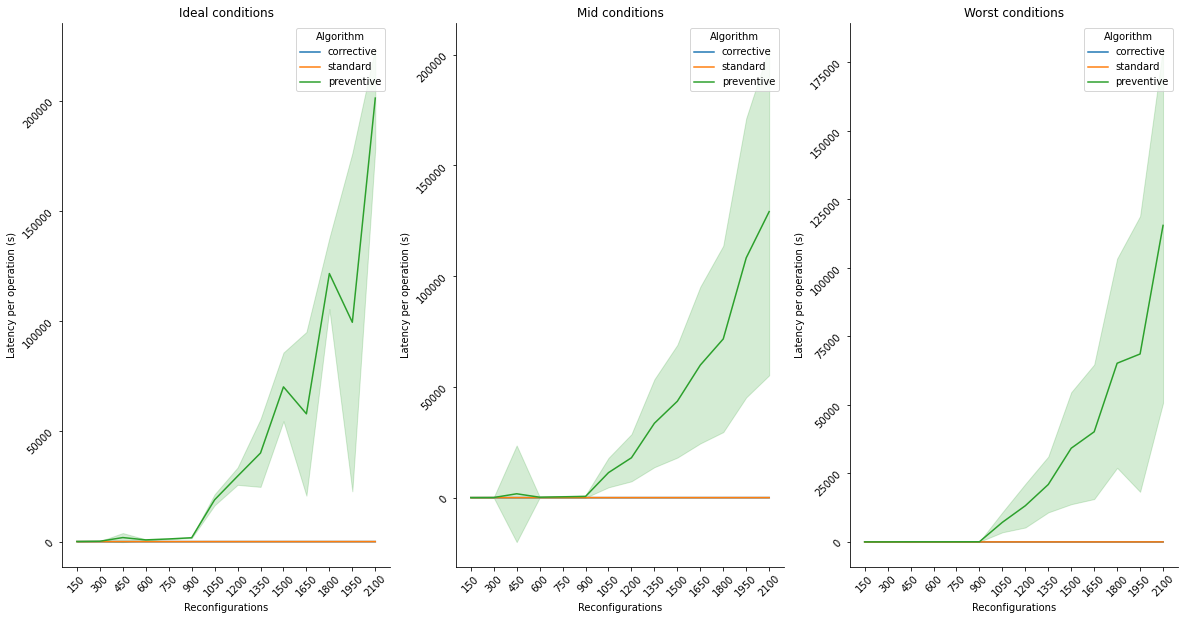

In [45]:
metric = 'latency_per_operation'
# fig, ax = plt.subplots(figsize=(20,10))
# g = sns.lineplot(data=ideal_results, x='update', y=metric, ci='sd', hue='Algorithm')


fig, ax = plt.subplots(1, 3, figsize=(20,10))
g = sns.lineplot(ax=ax[0], data=ideal_results, x='update', y=metric, ci='sd', hue='Algorithm')
g2 = sns.lineplot(ax=ax[1], data=mid_results, x='update', y=metric, ci='sd', hue='Algorithm')
g3 = sns.lineplot(ax=ax[2], data=worst_results, x='update', y=metric, ci='sd', hue='Algorithm')

g.set(ylabel='Latency per operation (s)')
g2.set(ylabel='Latency per operation (s)')
g3.set(ylabel='Latency per operation (s)')

g.set(xlabel='Reconfigurations')
g2.set(xlabel='Reconfigurations')
g3.set(xlabel='Reconfigurations')

ax[0].tick_params(labelrotation=45)
ax[1].tick_params(labelrotation=45)
ax[2].tick_params(labelrotation=45)

ax[0].set_title('Ideal conditions')
ax[1].set_title('Mid conditions')
ax[2].set_title('Worst conditions')

sns.despine()

plt.savefig(string_name_png, format='png', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)
plt.savefig(string_name_eps, format='pdf', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)

40425


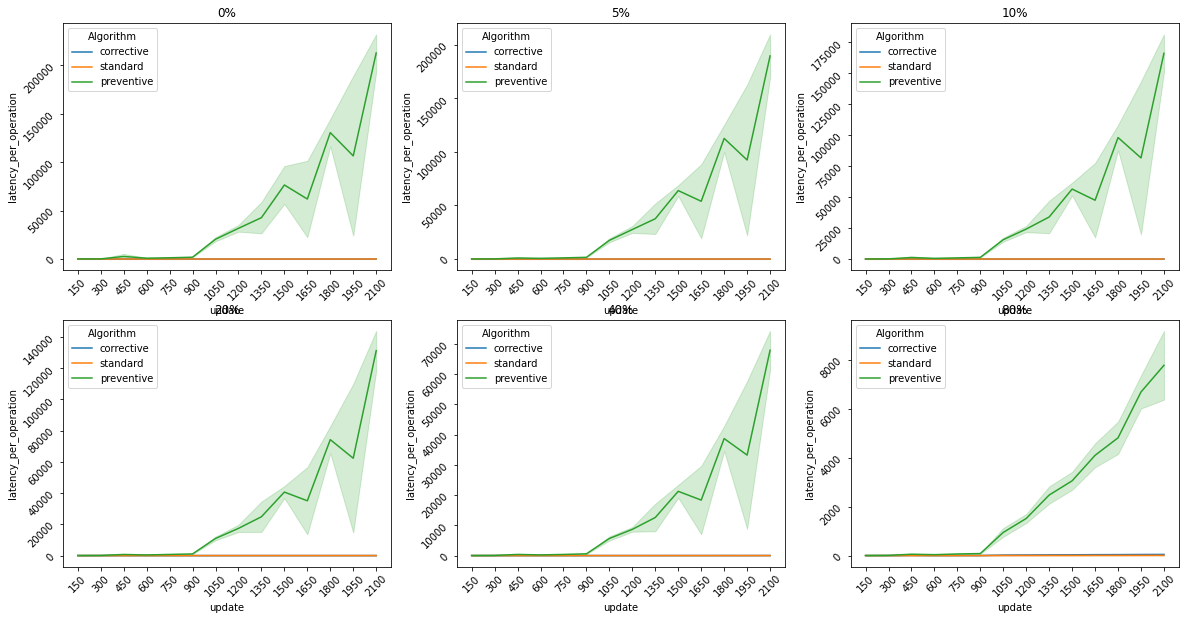

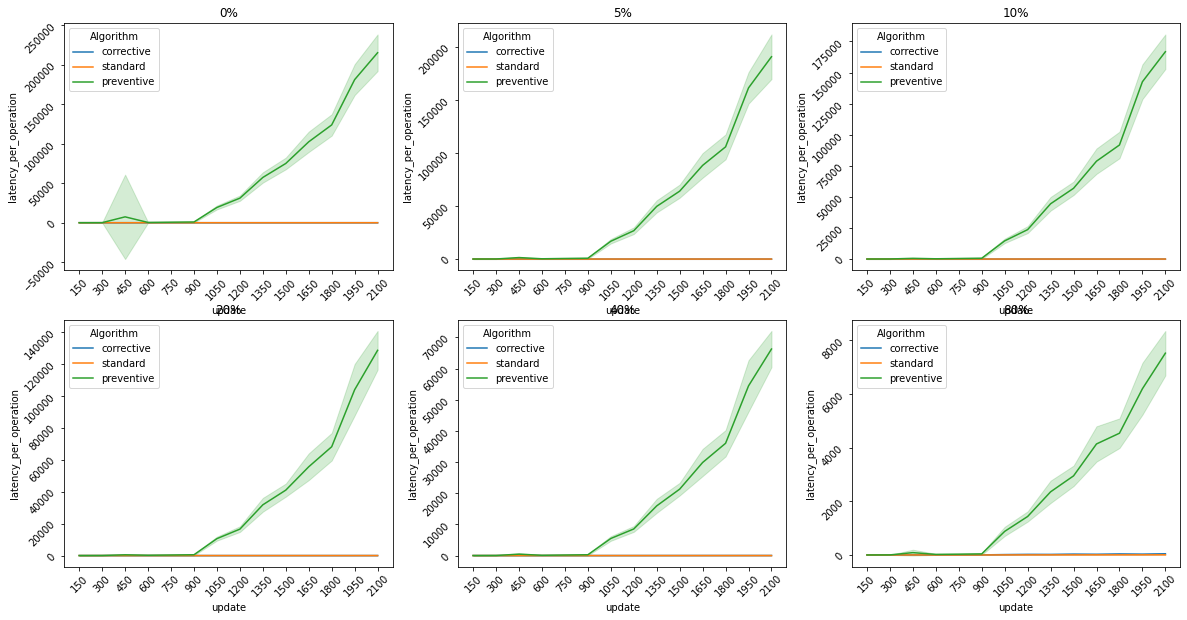

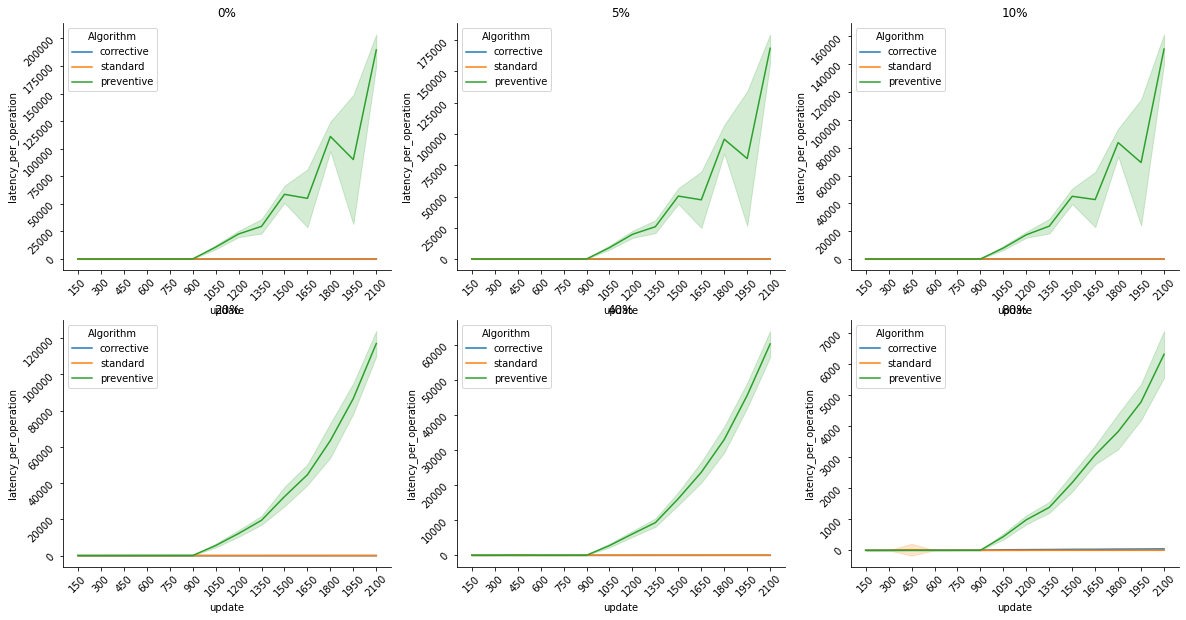

In [46]:
metric = 'latency_per_operation'
print(all_results.shape[0])

# ideal_results = all_results.loc[(all_results['delay'].isin(['1','10']))]

all_results['overhead_per_message'].div(1000.0).round(3) 

ideal_results_01 = all_results.loc[(all_results['delay'].isin(['1','10']))]

ideal_results_01_negation_00 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['0']))]
ideal_results_01_negation_05 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['5']))]
ideal_results_01_negation_10 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['10']))]
ideal_results_01_negation_20 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['20']))]
ideal_results_01_negation_40 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['40']))]
ideal_results_01_negation_80 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['80']))]

mid_results = all_results.loc[(all_results['delay'].isin(['100','1000']))]

mid_results_01_negation_00 = mid_results.loc[(mid_results['negation_probability'].isin(['0']))]
mid_results_01_negation_05 = mid_results.loc[(mid_results['negation_probability'].isin(['5']))]
mid_results_01_negation_10 = mid_results.loc[(mid_results['negation_probability'].isin(['10']))]
mid_results_01_negation_20 = mid_results.loc[(mid_results['negation_probability'].isin(['20']))]
mid_results_01_negation_40 = mid_results.loc[(mid_results['negation_probability'].isin(['40']))]
mid_results_01_negation_80 = mid_results.loc[(mid_results['negation_probability'].isin(['80']))]

worst_results = all_results.loc[(all_results['delay'].isin(['10000','100000']))]

worst_results_01_negation_00 = worst_results.loc[(worst_results['negation_probability'].isin(['0']))]
worst_results_01_negation_05 = worst_results.loc[(worst_results['negation_probability'].isin(['5']))]
worst_results_01_negation_10 = worst_results.loc[(worst_results['negation_probability'].isin(['10']))]
worst_results_01_negation_20 = worst_results.loc[(worst_results['negation_probability'].isin(['20']))]
worst_results_01_negation_40 = worst_results.loc[(worst_results['negation_probability'].isin(['40']))]
worst_results_01_negation_80 = worst_results.loc[(worst_results['negation_probability'].isin(['80']))]


ideal_results['overhead_per_message'].div(1000.0).round(3) 
mid_results['overhead_per_message'].div(1000.0).round(3) 
worst_results['overhead_per_message'].div(1000.0).round(3) 


# fig, ax = plt.subplots(figsize=(20,10))
# g = sns.lineplot(data=ideal_results, x='update', y='overhead_per_message', ci='sd', hue='Algorithm')

fig, ax = plt.subplots(2, 3, figsize=(20,10))
g_00_id = sns.lineplot(ax=ax[0,0], data=ideal_results_01_negation_00, x='update', y=metric, ci='sd', hue='Algorithm')
g_05_id = sns.lineplot(ax=ax[0,1], data=ideal_results_01_negation_05, x='update', y=metric, ci='sd', hue='Algorithm')
g_10_id = sns.lineplot(ax=ax[0,2], data=ideal_results_01_negation_10, x='update', y=metric, ci='sd', hue='Algorithm')
g_20_id = sns.lineplot(ax=ax[1,0], data=ideal_results_01_negation_20, x='update', y=metric, ci='sd', hue='Algorithm')
g_40_id = sns.lineplot(ax=ax[1,1], data=ideal_results_01_negation_40, x='update', y=metric, ci='sd', hue='Algorithm')
g_80_id = sns.lineplot(ax=ax[1,2], data=ideal_results_01_negation_80, x='update', y=metric, ci='sd', hue='Algorithm')

fig_mid, ax_mid = plt.subplots(2, 3, figsize=(20,10))
g_00_mid = sns.lineplot(ax=ax_mid[0,0], data=mid_results_01_negation_00, x='update', y=metric, ci='sd', hue='Algorithm')
g_05_mid = sns.lineplot(ax=ax_mid[0,1], data=mid_results_01_negation_05, x='update', y=metric, ci='sd', hue='Algorithm')
g_10_mid = sns.lineplot(ax=ax_mid[0,2], data=mid_results_01_negation_10, x='update', y=metric, ci='sd', hue='Algorithm')
g_20_mid = sns.lineplot(ax=ax_mid[1,0], data=mid_results_01_negation_20, x='update', y=metric, ci='sd', hue='Algorithm')
g_40_mid = sns.lineplot(ax=ax_mid[1,1], data=mid_results_01_negation_40, x='update', y=metric, ci='sd', hue='Algorithm')
g_80_mid = sns.lineplot(ax=ax_mid[1,2], data=mid_results_01_negation_80, x='update', y=metric, ci='sd', hue='Algorithm')

fig_worst, ax_worst = plt.subplots(2, 3, figsize=(20,10))
g_00_worst = sns.lineplot(ax=ax_worst[0,0], data=worst_results_01_negation_00, x='update', y=metric, ci='sd', hue='Algorithm')
g_05_worst = sns.lineplot(ax=ax_worst[0,1], data=worst_results_01_negation_05, x='update', y=metric, ci='sd', hue='Algorithm')
g_10_worst = sns.lineplot(ax=ax_worst[0,2], data=worst_results_01_negation_10, x='update', y=metric, ci='sd', hue='Algorithm')
g_20_worst = sns.lineplot(ax=ax_worst[1,0], data=worst_results_01_negation_20, x='update', y=metric, ci='sd', hue='Algorithm')
g_40_worst = sns.lineplot(ax=ax_worst[1,1], data=worst_results_01_negation_40, x='update', y=metric, ci='sd', hue='Algorithm')
g_80_worst = sns.lineplot(ax=ax_worst[1,2], data=worst_results_01_negation_80, x='update', y=metric, ci='sd', hue='Algorithm')


sns.despine()

# fig, ax = plt.subplots(1, 3, figsize=(20,10))
# g = sns.lineplot(ax=ax[0], data=ideal_results, x='update', y=metric, ci='sd', hue='Algorithm')
# g2 = sns.lineplot(ax=ax[1], data=mid_results, x='update', y=metric, ci='sd', hue='Algorithm')
# g3 = sns.lineplot(ax=ax[2], data=worst_results, x='update', y=metric, ci='sd', hue='Algorithm')

# g.set(ylabel='Overhead per Message (KB)')
# g2.set(ylabel='Overhead per Message (KB)')
# g3.set(ylabel='Overhead per Message (KB)')

# g.set(xlabel='Reconfigurations')
# g2.set(xlabel='Reconfigurations')
# g3.set(xlabel='Reconfigurations')

ax[0,0].tick_params(labelrotation=45)
ax[0,1].tick_params(labelrotation=45)
ax[0,2].tick_params(labelrotation=45)
ax[1,0].tick_params(labelrotation=45)
ax[1,1].tick_params(labelrotation=45)
ax[1,2].tick_params(labelrotation=45)

ax[0,0].set_title('0%')
ax[0,1].set_title('5%')
ax[0,2].set_title('10%')
ax[1,0].set_title('20%')
ax[1,1].set_title('40%')
ax[1,2].set_title('80%')

ax_mid[0,0].tick_params(labelrotation=45)
ax_mid[0,1].tick_params(labelrotation=45)
ax_mid[0,2].tick_params(labelrotation=45)
ax_mid[1,0].tick_params(labelrotation=45)
ax_mid[1,1].tick_params(labelrotation=45)
ax_mid[1,2].tick_params(labelrotation=45)

ax_mid[0,0].set_title('0%')
ax_mid[0,1].set_title('5%')
ax_mid[0,2].set_title('10%')
ax_mid[1,0].set_title('20%')
ax_mid[1,1].set_title('40%')
ax_mid[1,2].set_title('80%')

ax_worst[0,0].tick_params(labelrotation=45)
ax_worst[0,1].tick_params(labelrotation=45)
ax_worst[0,2].tick_params(labelrotation=45)
ax_worst[1,0].tick_params(labelrotation=45)
ax_worst[1,1].tick_params(labelrotation=45)
ax_worst[1,2].tick_params(labelrotation=45)

ax_worst[0,0].set_title('0%')
ax_worst[0,1].set_title('5%')
ax_worst[0,2].set_title('10%')
ax_worst[1,0].set_title('20%')
ax_worst[1,1].set_title('40%')
ax_worst[1,2].set_title('80%')


sns.despine()

# # plt.savefig(string_name_png, format='png', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)
# # plt.savefig(string_name_eps, format='pdf', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)

### Plot number of reconfigurations

In [47]:
metric = 'number_of_reconfigurations'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)

# # data_neg_30_del_10 =  all_results[(all_results['negation_probability'] =='30')] 
# data_neg_30_del_10 =  all_results


# fig, ax = plt.subplots(figsize=(9,5))
# g = sns.lineplot(data=data_neg_30_del_10, x="update", y=metric, ci='sd', hue="result_algorithm")
# g.set(ylabel='Extra reconfigurations')
# sns.despine()

# plt.savefig(string_name_png, format='png', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)
# plt.savefig(string_name_eps, format='pdf', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)

#### Ideal conditions

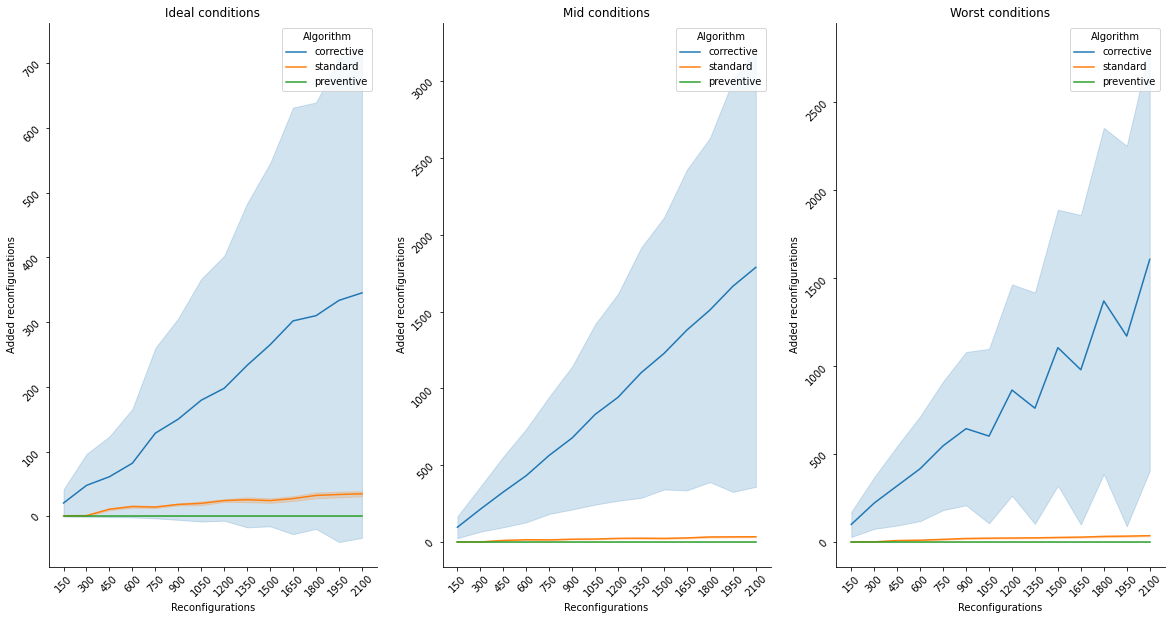

In [48]:
metric = 'number_of_reconfigurations'
# fig, ax = plt.subplots(figsize=(20,10))
# g = sns.lineplot(data=ideal_results, x='update', y=metric, ci='sd', hue='Algorithm')

fig, ax = plt.subplots(1, 3, figsize=(20,10))
g = sns.lineplot(ax=ax[0], data=ideal_results, x='update', y=metric, ci='sd', hue='Algorithm')
g2 = sns.lineplot(ax=ax[1], data=mid_results, x='update', y=metric, ci='sd', hue='Algorithm')
g3 = sns.lineplot(ax=ax[2], data=worst_results, x='update', y=metric, ci='sd', hue='Algorithm')

g.set(ylabel='Added reconfigurations')
g2.set(ylabel='Added reconfigurations')
g3.set(ylabel='Added reconfigurations')

g.set(xlabel='Reconfigurations')
g2.set(xlabel='Reconfigurations')
g3.set(xlabel='Reconfigurations')

ax[0].tick_params(labelrotation=45)
ax[1].tick_params(labelrotation=45)
ax[2].tick_params(labelrotation=45)

ax[0].set_title('Ideal conditions')
ax[1].set_title('Mid conditions')
ax[2].set_title('Worst conditions')

sns.despine()

plt.savefig(string_name_png, format='png', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)
plt.savefig(string_name_eps, format='pdf', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)

40425


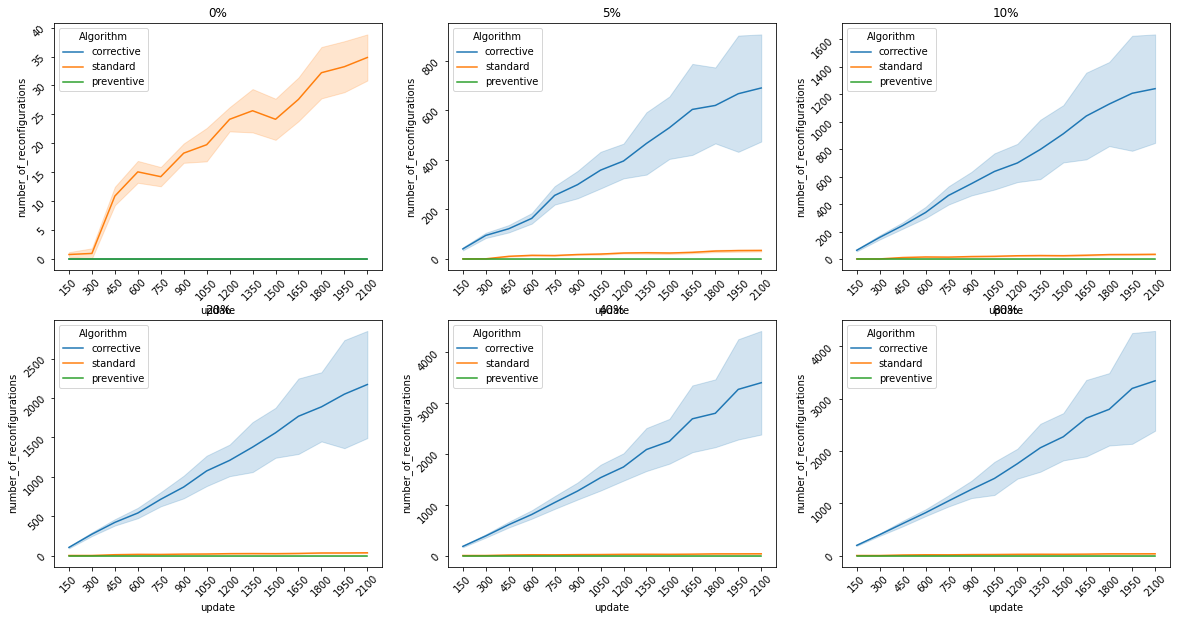

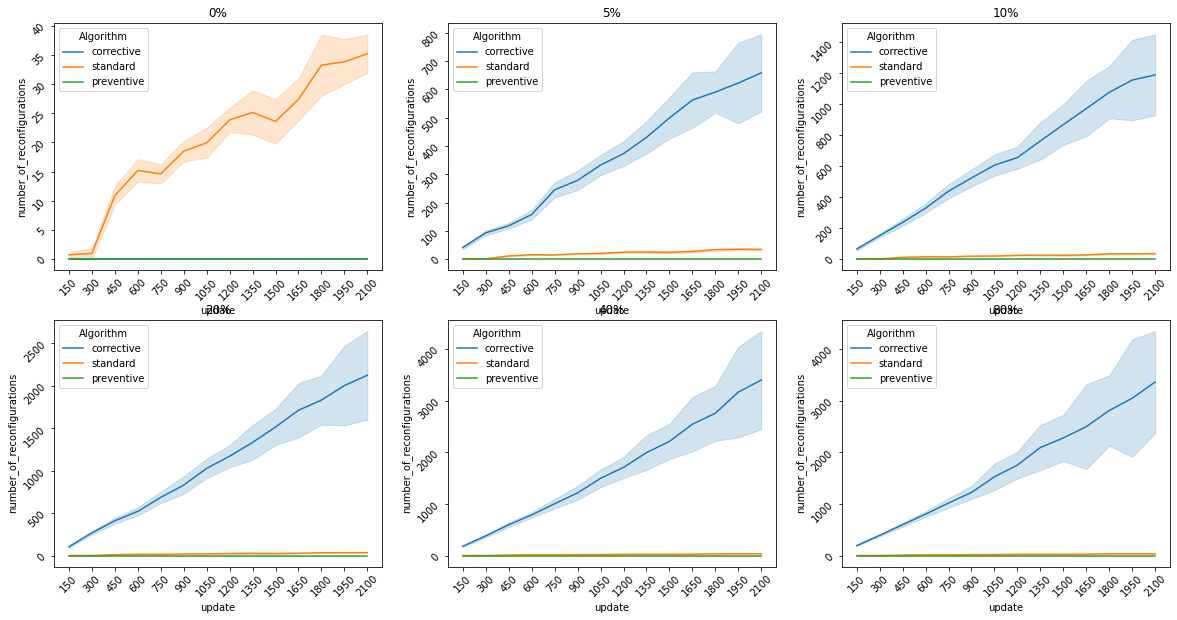

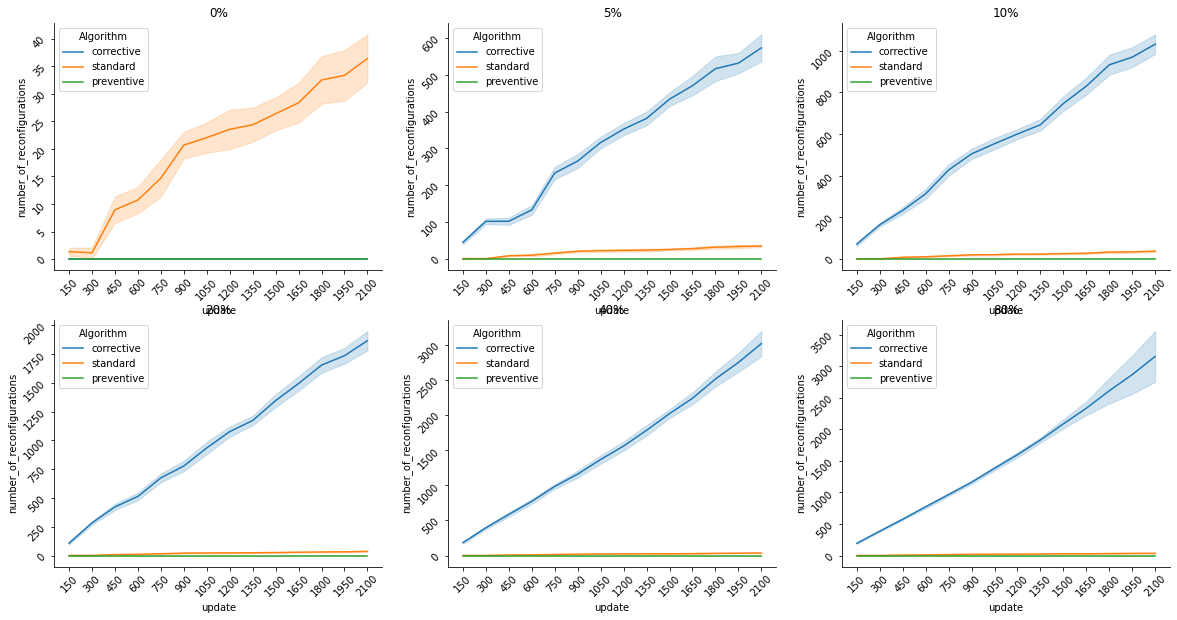

In [49]:
metric = 'number_of_reconfigurations'
print(all_results.shape[0])

# ideal_results = all_results.loc[(all_results['delay'].isin(['1','10']))]

all_results['overhead_per_message'].div(1000.0).round(3) 

ideal_results_01 = all_results.loc[(all_results['delay'].isin(['1','10']))]

ideal_results_01_negation_00 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['0']))]
ideal_results_01_negation_05 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['5']))]
ideal_results_01_negation_10 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['10']))]
ideal_results_01_negation_20 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['20']))]
ideal_results_01_negation_40 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['40']))]
ideal_results_01_negation_80 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['80']))]

mid_results = all_results.loc[(all_results['delay'].isin(['100','1000']))]

mid_results_01_negation_00 = mid_results.loc[(mid_results['negation_probability'].isin(['0']))]
mid_results_01_negation_05 = mid_results.loc[(mid_results['negation_probability'].isin(['5']))]
mid_results_01_negation_10 = mid_results.loc[(mid_results['negation_probability'].isin(['10']))]
mid_results_01_negation_20 = mid_results.loc[(mid_results['negation_probability'].isin(['20']))]
mid_results_01_negation_40 = mid_results.loc[(mid_results['negation_probability'].isin(['40']))]
mid_results_01_negation_80 = mid_results.loc[(mid_results['negation_probability'].isin(['80']))]

worst_results = all_results.loc[(all_results['delay'].isin(['10000','100000']))]

worst_results_01_negation_00 = worst_results.loc[(worst_results['negation_probability'].isin(['0']))]
worst_results_01_negation_05 = worst_results.loc[(worst_results['negation_probability'].isin(['5']))]
worst_results_01_negation_10 = worst_results.loc[(worst_results['negation_probability'].isin(['10']))]
worst_results_01_negation_20 = worst_results.loc[(worst_results['negation_probability'].isin(['20']))]
worst_results_01_negation_40 = worst_results.loc[(worst_results['negation_probability'].isin(['40']))]
worst_results_01_negation_80 = worst_results.loc[(worst_results['negation_probability'].isin(['80']))]


ideal_results['overhead_per_message'].div(1000.0).round(3) 
mid_results['overhead_per_message'].div(1000.0).round(3) 
worst_results['overhead_per_message'].div(1000.0).round(3) 


# fig, ax = plt.subplots(figsize=(20,10))
# g = sns.lineplot(data=ideal_results, x='update', y='overhead_per_message', ci='sd', hue='Algorithm')

fig, ax = plt.subplots(2, 3, figsize=(20,10))
g_00_id = sns.lineplot(ax=ax[0,0], data=ideal_results_01_negation_00, x='update', y=metric, ci='sd', hue='Algorithm')
g_05_id = sns.lineplot(ax=ax[0,1], data=ideal_results_01_negation_05, x='update', y=metric, ci='sd', hue='Algorithm')
g_10_id = sns.lineplot(ax=ax[0,2], data=ideal_results_01_negation_10, x='update', y=metric, ci='sd', hue='Algorithm')
g_20_id = sns.lineplot(ax=ax[1,0], data=ideal_results_01_negation_20, x='update', y=metric, ci='sd', hue='Algorithm')
g_40_id = sns.lineplot(ax=ax[1,1], data=ideal_results_01_negation_40, x='update', y=metric, ci='sd', hue='Algorithm')
g_80_id = sns.lineplot(ax=ax[1,2], data=ideal_results_01_negation_80, x='update', y=metric, ci='sd', hue='Algorithm')

fig_mid, ax_mid = plt.subplots(2, 3, figsize=(20,10))
g_00_mid = sns.lineplot(ax=ax_mid[0,0], data=mid_results_01_negation_00, x='update', y=metric, ci='sd', hue='Algorithm')
g_05_mid = sns.lineplot(ax=ax_mid[0,1], data=mid_results_01_negation_05, x='update', y=metric, ci='sd', hue='Algorithm')
g_10_mid = sns.lineplot(ax=ax_mid[0,2], data=mid_results_01_negation_10, x='update', y=metric, ci='sd', hue='Algorithm')
g_20_mid = sns.lineplot(ax=ax_mid[1,0], data=mid_results_01_negation_20, x='update', y=metric, ci='sd', hue='Algorithm')
g_40_mid = sns.lineplot(ax=ax_mid[1,1], data=mid_results_01_negation_40, x='update', y=metric, ci='sd', hue='Algorithm')
g_80_mid = sns.lineplot(ax=ax_mid[1,2], data=mid_results_01_negation_80, x='update', y=metric, ci='sd', hue='Algorithm')

fig_worst, ax_worst = plt.subplots(2, 3, figsize=(20,10))
g_00_worst = sns.lineplot(ax=ax_worst[0,0], data=worst_results_01_negation_00, x='update', y=metric, ci='sd', hue='Algorithm')
g_05_worst = sns.lineplot(ax=ax_worst[0,1], data=worst_results_01_negation_05, x='update', y=metric, ci='sd', hue='Algorithm')
g_10_worst = sns.lineplot(ax=ax_worst[0,2], data=worst_results_01_negation_10, x='update', y=metric, ci='sd', hue='Algorithm')
g_20_worst = sns.lineplot(ax=ax_worst[1,0], data=worst_results_01_negation_20, x='update', y=metric, ci='sd', hue='Algorithm')
g_40_worst = sns.lineplot(ax=ax_worst[1,1], data=worst_results_01_negation_40, x='update', y=metric, ci='sd', hue='Algorithm')
g_80_worst = sns.lineplot(ax=ax_worst[1,2], data=worst_results_01_negation_80, x='update', y=metric, ci='sd', hue='Algorithm')


sns.despine()

# fig, ax = plt.subplots(1, 3, figsize=(20,10))
# g = sns.lineplot(ax=ax[0], data=ideal_results, x='update', y=metric, ci='sd', hue='Algorithm')
# g2 = sns.lineplot(ax=ax[1], data=mid_results, x='update', y=metric, ci='sd', hue='Algorithm')
# g3 = sns.lineplot(ax=ax[2], data=worst_results, x='update', y=metric, ci='sd', hue='Algorithm')

# g.set(ylabel='Overhead per Message (KB)')
# g2.set(ylabel='Overhead per Message (KB)')
# g3.set(ylabel='Overhead per Message (KB)')

# g.set(xlabel='Reconfigurations')
# g2.set(xlabel='Reconfigurations')
# g3.set(xlabel='Reconfigurations')

ax[0,0].tick_params(labelrotation=45)
ax[0,1].tick_params(labelrotation=45)
ax[0,2].tick_params(labelrotation=45)
ax[1,0].tick_params(labelrotation=45)
ax[1,1].tick_params(labelrotation=45)
ax[1,2].tick_params(labelrotation=45)

ax[0,0].set_title('0%')
ax[0,1].set_title('5%')
ax[0,2].set_title('10%')
ax[1,0].set_title('20%')
ax[1,1].set_title('40%')
ax[1,2].set_title('80%')

ax_mid[0,0].tick_params(labelrotation=45)
ax_mid[0,1].tick_params(labelrotation=45)
ax_mid[0,2].tick_params(labelrotation=45)
ax_mid[1,0].tick_params(labelrotation=45)
ax_mid[1,1].tick_params(labelrotation=45)
ax_mid[1,2].tick_params(labelrotation=45)

ax_mid[0,0].set_title('0%')
ax_mid[0,1].set_title('5%')
ax_mid[0,2].set_title('10%')
ax_mid[1,0].set_title('20%')
ax_mid[1,1].set_title('40%')
ax_mid[1,2].set_title('80%')

ax_worst[0,0].tick_params(labelrotation=45)
ax_worst[0,1].tick_params(labelrotation=45)
ax_worst[0,2].tick_params(labelrotation=45)
ax_worst[1,0].tick_params(labelrotation=45)
ax_worst[1,1].tick_params(labelrotation=45)
ax_worst[1,2].tick_params(labelrotation=45)

ax_worst[0,0].set_title('0%')
ax_worst[0,1].set_title('5%')
ax_worst[0,2].set_title('10%')
ax_worst[1,0].set_title('20%')
ax_worst[1,1].set_title('40%')
ax_worst[1,2].set_title('80%')


sns.despine()

# # plt.savefig(string_name_png, format='png', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)
# # plt.savefig(string_name_eps, format='pdf', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)

### Total reconfiguration time

In [50]:
metric = 'total_reconfiguration_time'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)

# # data_neg_30_del_10 =  all_results[(all_results['negation_probability'] =='30')] 
# data_neg_30_del_10 =  all_results

# fig, ax = plt.subplots(figsize=(9,5))
# g = sns.lineplot(data=data_neg_30_del_10, x="update", y=metric, ci='sd', hue="result_algorithm")
# g.set(ylabel='Total reconfiguration time(s)')
# sns.despine()

# plt.savefig(string_name_png, format='png', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)
# plt.savefig(string_name_eps, format='pdf', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)

#### Ideal conditions

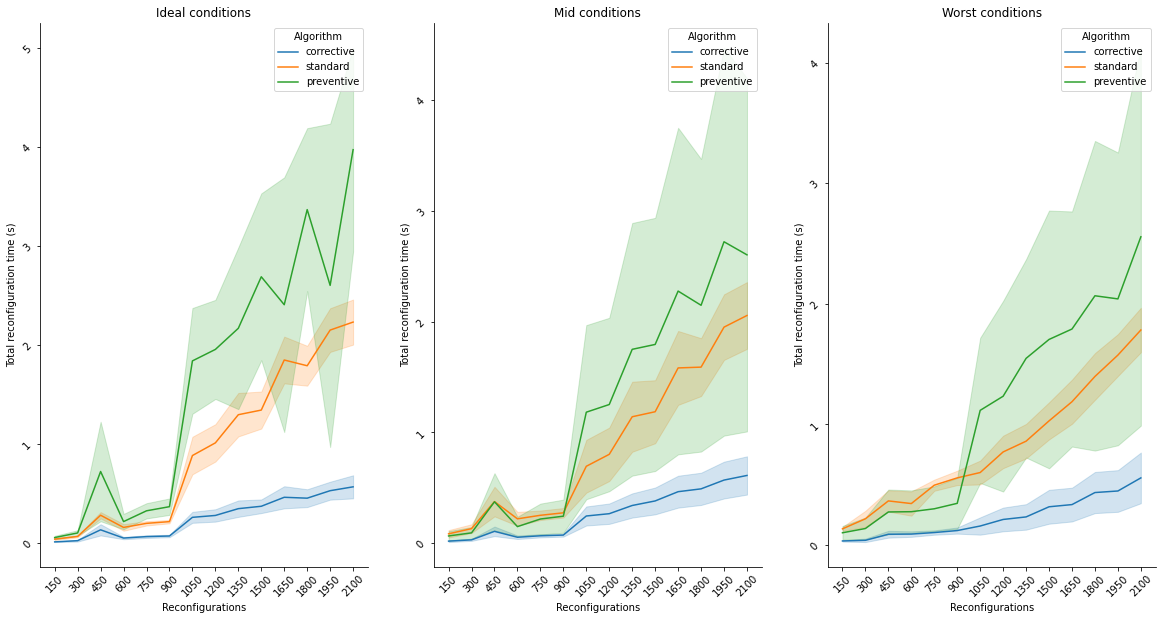

In [51]:
metric = 'total_reconfiguration_time'
# fig, ax = plt.subplots(figsize=(20,10))
# g = sns.lineplot(data=ideal_results, x='update', y=metric, ci='sd', hue='Algorithm')

fig, ax = plt.subplots(1, 3, figsize=(20,10))
g = sns.lineplot(ax=ax[0], data=ideal_results, x='update', y=metric, ci='sd', hue='Algorithm')
g2 = sns.lineplot(ax=ax[1], data=mid_results, x='update', y=metric, ci='sd', hue='Algorithm')
g3 = sns.lineplot(ax=ax[2], data=worst_results, x='update', y=metric, ci='sd', hue='Algorithm')

g.set(ylabel='Total reconfiguration time (s)')
g2.set(ylabel='Total reconfiguration time (s)')
g3.set(ylabel='Total reconfiguration time (s)')

g.set(xlabel='Reconfigurations')
g2.set(xlabel='Reconfigurations')
g3.set(xlabel='Reconfigurations')

ax[0].tick_params(labelrotation=45)
ax[1].tick_params(labelrotation=45)
ax[2].tick_params(labelrotation=45)

ax[0].set_title('Ideal conditions')
ax[1].set_title('Mid conditions')
ax[2].set_title('Worst conditions')

sns.despine()

plt.savefig(string_name_png, format='png', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)
plt.savefig(string_name_eps, format='pdf', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)

40425


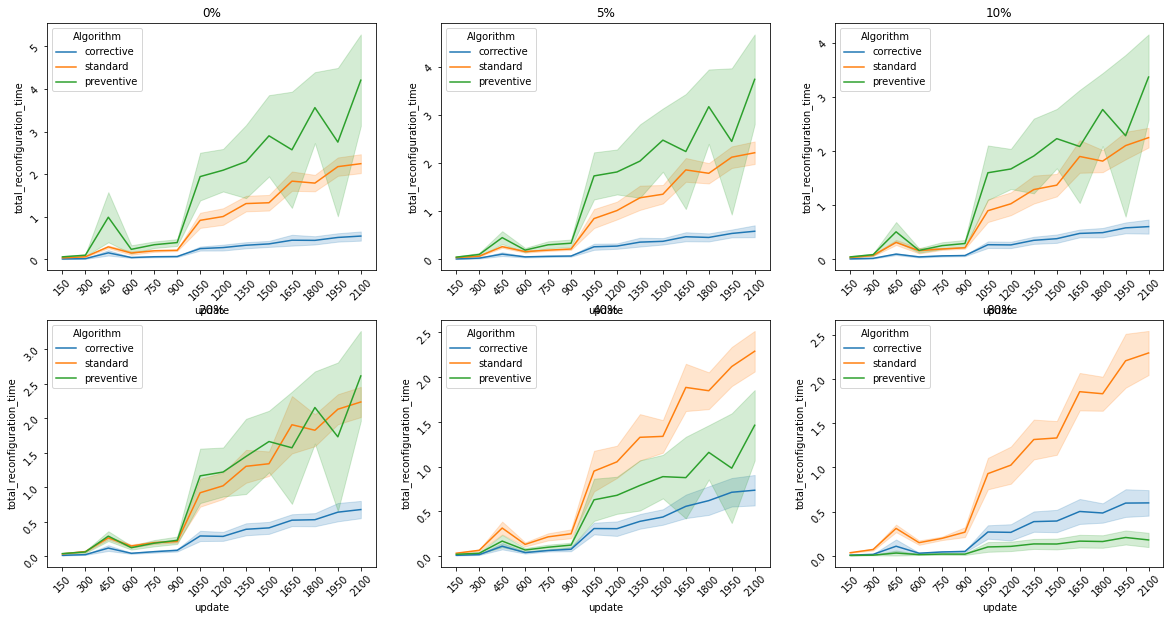

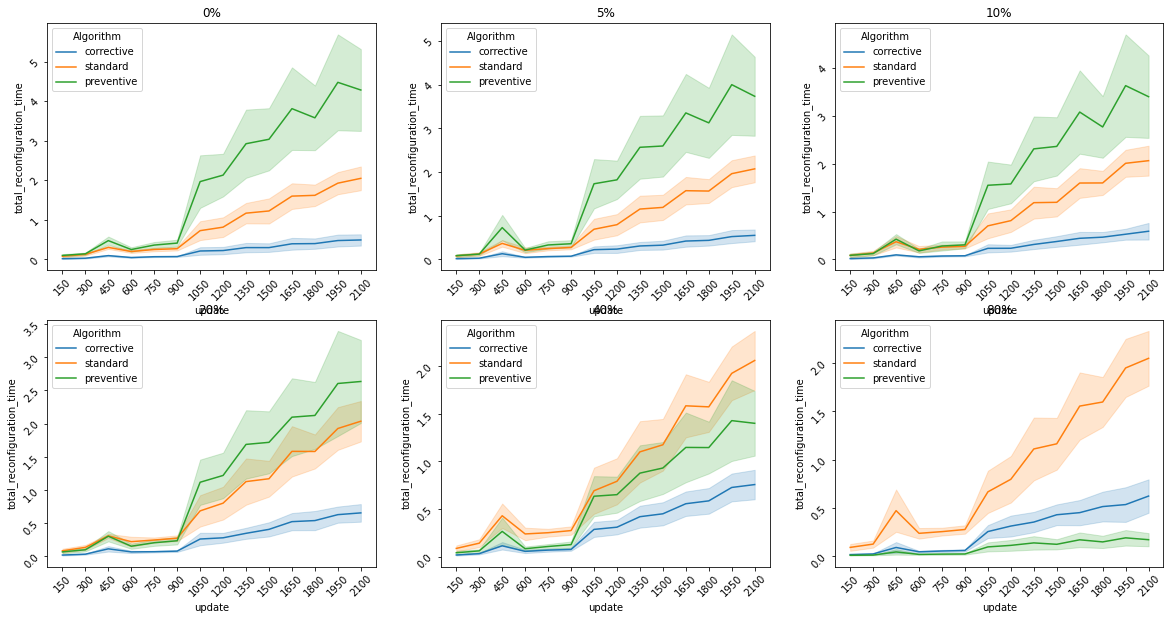

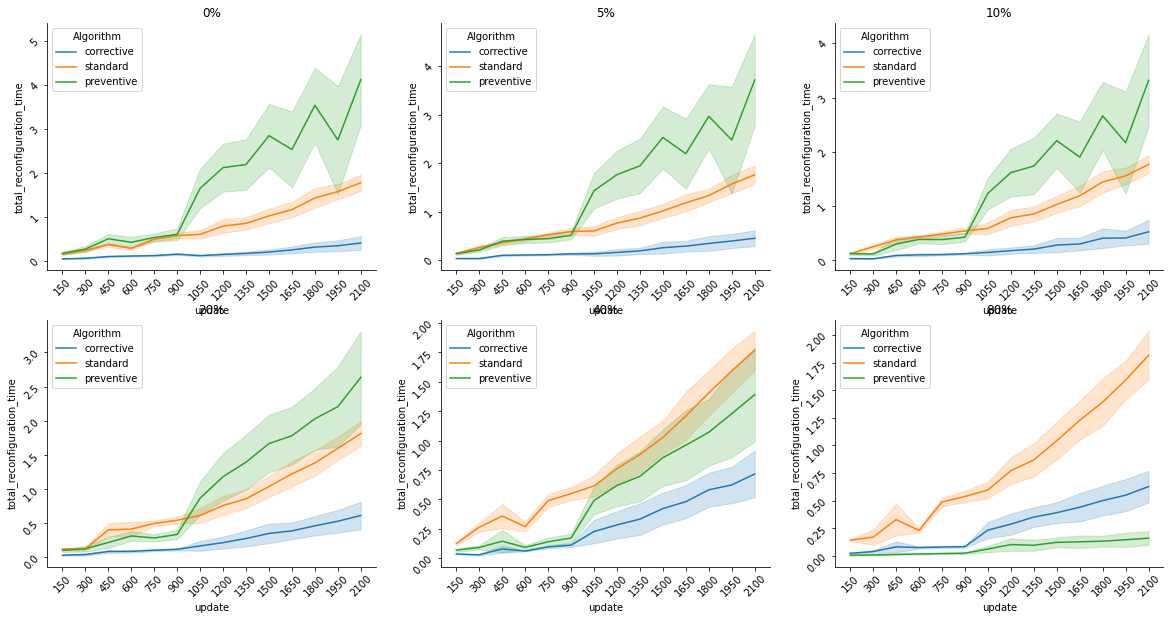

In [52]:
metric = 'total_reconfiguration_time'
print(all_results.shape[0])

# ideal_results = all_results.loc[(all_results['delay'].isin(['1','10']))]

all_results['overhead_per_message'].div(1000.0).round(3) 

ideal_results_01 = all_results.loc[(all_results['delay'].isin(['1','10']))]

ideal_results_01_negation_00 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['0']))]
ideal_results_01_negation_05 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['5']))]
ideal_results_01_negation_10 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['10']))]
ideal_results_01_negation_20 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['20']))]
ideal_results_01_negation_40 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['40']))]
ideal_results_01_negation_80 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['80']))]

mid_results = all_results.loc[(all_results['delay'].isin(['100','1000']))]

mid_results_01_negation_00 = mid_results.loc[(mid_results['negation_probability'].isin(['0']))]
mid_results_01_negation_05 = mid_results.loc[(mid_results['negation_probability'].isin(['5']))]
mid_results_01_negation_10 = mid_results.loc[(mid_results['negation_probability'].isin(['10']))]
mid_results_01_negation_20 = mid_results.loc[(mid_results['negation_probability'].isin(['20']))]
mid_results_01_negation_40 = mid_results.loc[(mid_results['negation_probability'].isin(['40']))]
mid_results_01_negation_80 = mid_results.loc[(mid_results['negation_probability'].isin(['80']))]

worst_results = all_results.loc[(all_results['delay'].isin(['10000','100000']))]

worst_results_01_negation_00 = worst_results.loc[(worst_results['negation_probability'].isin(['0']))]
worst_results_01_negation_05 = worst_results.loc[(worst_results['negation_probability'].isin(['5']))]
worst_results_01_negation_10 = worst_results.loc[(worst_results['negation_probability'].isin(['10']))]
worst_results_01_negation_20 = worst_results.loc[(worst_results['negation_probability'].isin(['20']))]
worst_results_01_negation_40 = worst_results.loc[(worst_results['negation_probability'].isin(['40']))]
worst_results_01_negation_80 = worst_results.loc[(worst_results['negation_probability'].isin(['80']))]


ideal_results['overhead_per_message'].div(1000.0).round(3) 
mid_results['overhead_per_message'].div(1000.0).round(3) 
worst_results['overhead_per_message'].div(1000.0).round(3) 


# fig, ax = plt.subplots(figsize=(20,10))
# g = sns.lineplot(data=ideal_results, x='update', y='overhead_per_message', ci='sd', hue='Algorithm')

fig, ax = plt.subplots(2, 3, figsize=(20,10))
g_00_id = sns.lineplot(ax=ax[0,0], data=ideal_results_01_negation_00, x='update', y=metric, ci='sd', hue='Algorithm')
g_05_id = sns.lineplot(ax=ax[0,1], data=ideal_results_01_negation_05, x='update', y=metric, ci='sd', hue='Algorithm')
g_10_id = sns.lineplot(ax=ax[0,2], data=ideal_results_01_negation_10, x='update', y=metric, ci='sd', hue='Algorithm')
g_20_id = sns.lineplot(ax=ax[1,0], data=ideal_results_01_negation_20, x='update', y=metric, ci='sd', hue='Algorithm')
g_40_id = sns.lineplot(ax=ax[1,1], data=ideal_results_01_negation_40, x='update', y=metric, ci='sd', hue='Algorithm')
g_80_id = sns.lineplot(ax=ax[1,2], data=ideal_results_01_negation_80, x='update', y=metric, ci='sd', hue='Algorithm')

fig_mid, ax_mid = plt.subplots(2, 3, figsize=(20,10))
g_00_mid = sns.lineplot(ax=ax_mid[0,0], data=mid_results_01_negation_00, x='update', y=metric, ci='sd', hue='Algorithm')
g_05_mid = sns.lineplot(ax=ax_mid[0,1], data=mid_results_01_negation_05, x='update', y=metric, ci='sd', hue='Algorithm')
g_10_mid = sns.lineplot(ax=ax_mid[0,2], data=mid_results_01_negation_10, x='update', y=metric, ci='sd', hue='Algorithm')
g_20_mid = sns.lineplot(ax=ax_mid[1,0], data=mid_results_01_negation_20, x='update', y=metric, ci='sd', hue='Algorithm')
g_40_mid = sns.lineplot(ax=ax_mid[1,1], data=mid_results_01_negation_40, x='update', y=metric, ci='sd', hue='Algorithm')
g_80_mid = sns.lineplot(ax=ax_mid[1,2], data=mid_results_01_negation_80, x='update', y=metric, ci='sd', hue='Algorithm')

fig_worst, ax_worst = plt.subplots(2, 3, figsize=(20,10))
g_00_worst = sns.lineplot(ax=ax_worst[0,0], data=worst_results_01_negation_00, x='update', y=metric, ci='sd', hue='Algorithm')
g_05_worst = sns.lineplot(ax=ax_worst[0,1], data=worst_results_01_negation_05, x='update', y=metric, ci='sd', hue='Algorithm')
g_10_worst = sns.lineplot(ax=ax_worst[0,2], data=worst_results_01_negation_10, x='update', y=metric, ci='sd', hue='Algorithm')
g_20_worst = sns.lineplot(ax=ax_worst[1,0], data=worst_results_01_negation_20, x='update', y=metric, ci='sd', hue='Algorithm')
g_40_worst = sns.lineplot(ax=ax_worst[1,1], data=worst_results_01_negation_40, x='update', y=metric, ci='sd', hue='Algorithm')
g_80_worst = sns.lineplot(ax=ax_worst[1,2], data=worst_results_01_negation_80, x='update', y=metric, ci='sd', hue='Algorithm')


sns.despine()

# fig, ax = plt.subplots(1, 3, figsize=(20,10))
# g = sns.lineplot(ax=ax[0], data=ideal_results, x='update', y=metric, ci='sd', hue='Algorithm')
# g2 = sns.lineplot(ax=ax[1], data=mid_results, x='update', y=metric, ci='sd', hue='Algorithm')
# g3 = sns.lineplot(ax=ax[2], data=worst_results, x='update', y=metric, ci='sd', hue='Algorithm')

# g.set(ylabel='Overhead per Message (KB)')
# g2.set(ylabel='Overhead per Message (KB)')
# g3.set(ylabel='Overhead per Message (KB)')

# g.set(xlabel='Reconfigurations')
# g2.set(xlabel='Reconfigurations')
# g3.set(xlabel='Reconfigurations')

ax[0,0].tick_params(labelrotation=45)
ax[0,1].tick_params(labelrotation=45)
ax[0,2].tick_params(labelrotation=45)
ax[1,0].tick_params(labelrotation=45)
ax[1,1].tick_params(labelrotation=45)
ax[1,2].tick_params(labelrotation=45)

ax[0,0].set_title('0%')
ax[0,1].set_title('5%')
ax[0,2].set_title('10%')
ax[1,0].set_title('20%')
ax[1,1].set_title('40%')
ax[1,2].set_title('80%')

ax_mid[0,0].tick_params(labelrotation=45)
ax_mid[0,1].tick_params(labelrotation=45)
ax_mid[0,2].tick_params(labelrotation=45)
ax_mid[1,0].tick_params(labelrotation=45)
ax_mid[1,1].tick_params(labelrotation=45)
ax_mid[1,2].tick_params(labelrotation=45)

ax_mid[0,0].set_title('0%')
ax_mid[0,1].set_title('5%')
ax_mid[0,2].set_title('10%')
ax_mid[1,0].set_title('20%')
ax_mid[1,1].set_title('40%')
ax_mid[1,2].set_title('80%')

ax_worst[0,0].tick_params(labelrotation=45)
ax_worst[0,1].tick_params(labelrotation=45)
ax_worst[0,2].tick_params(labelrotation=45)
ax_worst[1,0].tick_params(labelrotation=45)
ax_worst[1,1].tick_params(labelrotation=45)
ax_worst[1,2].tick_params(labelrotation=45)

ax_worst[0,0].set_title('0%')
ax_worst[0,1].set_title('5%')
ax_worst[0,2].set_title('10%')
ax_worst[1,0].set_title('20%')
ax_worst[1,1].set_title('40%')
ax_worst[1,2].set_title('80%')


sns.despine()

# # plt.savefig(string_name_png, format='png', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)
# # plt.savefig(string_name_eps, format='pdf', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)

### Plot inconsistencies

In [53]:
metric = 'inconsistencies'
results_dir_png = current_directory + file_path_images + 'png/'+metric +'/'
results_dir_eps = current_directory + file_path_images + 'eps/'+metric +'/'
string_name_png = current_directory + file_path_images + 'png/'+metric +'/' + 'result_' + metric + '_' + type_exp + '.png'
string_name_eps = current_directory + file_path_images + 'eps/'+metric +'/' + 'result_' + metric + '_' + type_exp + '.pdf'

if not os.path.isdir(results_dir_png):
    os.makedirs(results_dir_png)

if not os.path.isdir(results_dir_eps):
    os.makedirs(results_dir_eps)

# # data_neg_30_del_10 =  all_results[(all_results['negation_probability'] =='30')] 
# data_neg_30_del_10 =  all_results

# fig, ax = plt.subplots(figsize=(9,5))
# g = sns.lineplot(data=data_neg_30_del_10, x="update", y=metric, ci='sd', hue="result_algorithm")
# g.set(ylabel='Inconsistencies')
# sns.despine()

# plt.savefig(string_name_png, format='png', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)
# plt.savefig(string_name_eps, format='pdf', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)

#### Ideal conditions

ValueError: Unable to parse string "" at position 7285

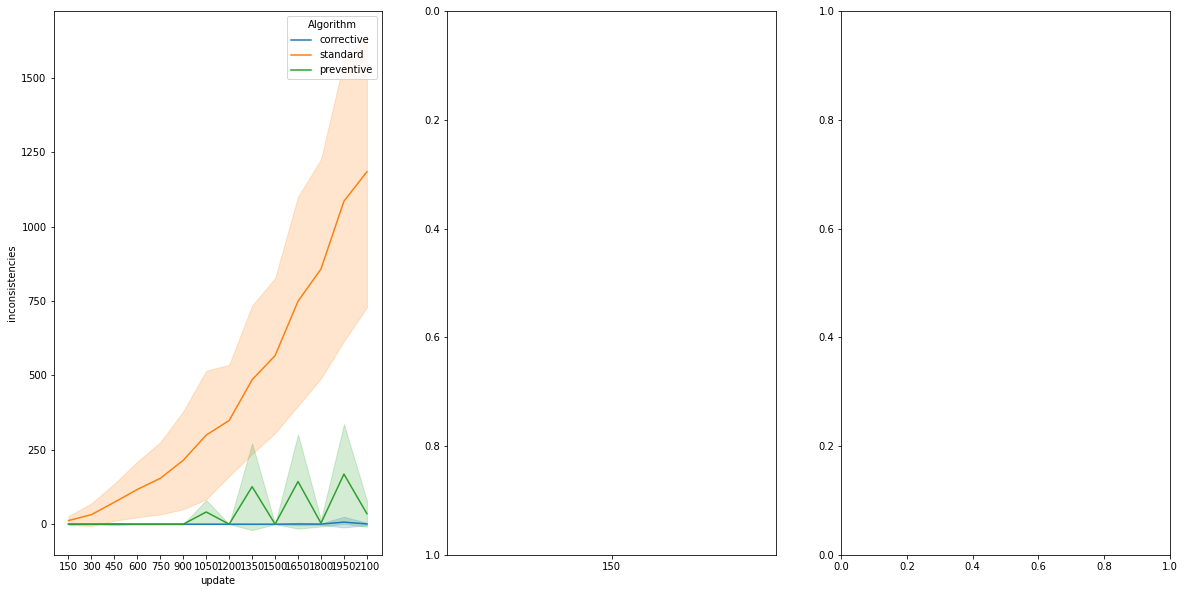

In [54]:
metric = 'inconsistencies'
# fig, ax = plt.subplots(figsize=(20,10))
# g = sns.lineplot(data=ideal_results, x='update', y=metric, ci='sd', hue='Algorithm')

fig, ax = plt.subplots(1, 3, figsize=(20,10))
g = sns.lineplot(ax=ax[0], data=ideal_results, x='update', y=metric, ci='sd', hue='Algorithm')
g2 = sns.lineplot(ax=ax[1], data=mid_results, x='update', y=metric, ci='sd', hue='Algorithm')
# g3 = sns.lineplot(ax=ax[2], data=worst_results, x='update', y=metric, ci='sd', hue='Algorithm')

g.set(ylabel='Inconsistencies')
# g2.set(ylabel='Inconsistencies')
# g3.set(ylabel='Inconsistencies')

g.set(xlabel='Reconfigurations')
# g2.set(xlabel='Reconfigurations')
# g3.set(xlabel='Reconfigurations')

ax[0].tick_params(labelrotation=45)
ax[1].tick_params(labelrotation=45)
ax[2].tick_params(labelrotation=45)

ax[0].set_title('Ideal conditions')
ax[1].set_title('Mid conditions')
ax[2].set_title('Worst conditions')

sns.despine()

plt.savefig(string_name_png, format='png', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)
plt.savefig(string_name_eps, format='pdf', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)

In [ ]:
metric = 'inconsistencies'
print(all_results.shape[0])

# ideal_results = all_results.loc[(all_results['delay'].isin(['1','10']))]

all_results['overhead_per_message'].div(1000.0).round(3) 

ideal_results_01 = all_results.loc[(all_results['delay'].isin(['1','10']))]

ideal_results_01_negation_00 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['0']))]
ideal_results_01_negation_05 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['5']))]
ideal_results_01_negation_10 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['10']))]
ideal_results_01_negation_20 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['20']))]
ideal_results_01_negation_40 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['40']))]
ideal_results_01_negation_80 = ideal_results_01.loc[(ideal_results_01['negation_probability'].isin(['80']))]

mid_results = all_results.loc[(all_results['delay'].isin(['100','1000']))]

mid_results_01_negation_00 = mid_results.loc[(mid_results['negation_probability'].isin(['0']))]
mid_results_01_negation_05 = mid_results.loc[(mid_results['negation_probability'].isin(['5']))]
mid_results_01_negation_10 = mid_results.loc[(mid_results['negation_probability'].isin(['10']))]
mid_results_01_negation_20 = mid_results.loc[(mid_results['negation_probability'].isin(['20']))]
mid_results_01_negation_40 = mid_results.loc[(mid_results['negation_probability'].isin(['40']))]
mid_results_01_negation_80 = mid_results.loc[(mid_results['negation_probability'].isin(['80']))]

worst_results = all_results.loc[(all_results['delay'].isin(['10000','100000']))]

worst_results_01_negation_00 = worst_results.loc[(worst_results['negation_probability'].isin(['0']))]
worst_results_01_negation_05 = worst_results.loc[(worst_results['negation_probability'].isin(['5']))]
worst_results_01_negation_10 = worst_results.loc[(worst_results['negation_probability'].isin(['10']))]
worst_results_01_negation_20 = worst_results.loc[(worst_results['negation_probability'].isin(['20']))]
worst_results_01_negation_40 = worst_results.loc[(worst_results['negation_probability'].isin(['40']))]
worst_results_01_negation_80 = worst_results.loc[(worst_results['negation_probability'].isin(['80']))]


ideal_results['overhead_per_message'].div(1000.0).round(3) 
mid_results['overhead_per_message'].div(1000.0).round(3) 
worst_results['overhead_per_message'].div(1000.0).round(3) 


# fig, ax = plt.subplots(figsize=(20,10))
# g = sns.lineplot(data=ideal_results, x='update', y='overhead_per_message', ci='sd', hue='Algorithm')

fig, ax = plt.subplots(2, 3, figsize=(20,10))
g_00_id = sns.lineplot(ax=ax[0,0], data=ideal_results_01_negation_00, x='update', y=metric, ci='sd', hue='Algorithm')
g_05_id = sns.lineplot(ax=ax[0,1], data=ideal_results_01_negation_05, x='update', y=metric, ci='sd', hue='Algorithm')
g_10_id = sns.lineplot(ax=ax[0,2], data=ideal_results_01_negation_10, x='update', y=metric, ci='sd', hue='Algorithm')
g_20_id = sns.lineplot(ax=ax[1,0], data=ideal_results_01_negation_20, x='update', y=metric, ci='sd', hue='Algorithm')
g_40_id = sns.lineplot(ax=ax[1,1], data=ideal_results_01_negation_40, x='update', y=metric, ci='sd', hue='Algorithm')
g_80_id = sns.lineplot(ax=ax[1,2], data=ideal_results_01_negation_80, x='update', y=metric, ci='sd', hue='Algorithm')

fig_mid, ax_mid = plt.subplots(2, 3, figsize=(20,10))
g_00_mid = sns.lineplot(ax=ax_mid[0,0], data=mid_results_01_negation_00, x='update', y=metric, ci='sd', hue='Algorithm')
g_05_mid = sns.lineplot(ax=ax_mid[0,1], data=mid_results_01_negation_05, x='update', y=metric, ci='sd', hue='Algorithm')
g_10_mid = sns.lineplot(ax=ax_mid[0,2], data=mid_results_01_negation_10, x='update', y=metric, ci='sd', hue='Algorithm')
g_20_mid = sns.lineplot(ax=ax_mid[1,0], data=mid_results_01_negation_20, x='update', y=metric, ci='sd', hue='Algorithm')
g_40_mid = sns.lineplot(ax=ax_mid[1,1], data=mid_results_01_negation_40, x='update', y=metric, ci='sd', hue='Algorithm')
g_80_mid = sns.lineplot(ax=ax_mid[1,2], data=mid_results_01_negation_80, x='update', y=metric, ci='sd', hue='Algorithm')

fig_worst, ax_worst = plt.subplots(2, 3, figsize=(20,10))
g_00_worst = sns.lineplot(ax=ax_worst[0,0], data=worst_results_01_negation_00, x='update', y=metric, ci='sd', hue='Algorithm')
g_05_worst = sns.lineplot(ax=ax_worst[0,1], data=worst_results_01_negation_05, x='update', y=metric, ci='sd', hue='Algorithm')
g_10_worst = sns.lineplot(ax=ax_worst[0,2], data=worst_results_01_negation_10, x='update', y=metric, ci='sd', hue='Algorithm')
g_20_worst = sns.lineplot(ax=ax_worst[1,0], data=worst_results_01_negation_20, x='update', y=metric, ci='sd', hue='Algorithm')
g_40_worst = sns.lineplot(ax=ax_worst[1,1], data=worst_results_01_negation_40, x='update', y=metric, ci='sd', hue='Algorithm')
g_80_worst = sns.lineplot(ax=ax_worst[1,2], data=worst_results_01_negation_80, x='update', y=metric, ci='sd', hue='Algorithm')


sns.despine()

# fig, ax = plt.subplots(1, 3, figsize=(20,10))
# g = sns.lineplot(ax=ax[0], data=ideal_results, x='update', y=metric, ci='sd', hue='Algorithm')
# g2 = sns.lineplot(ax=ax[1], data=mid_results, x='update', y=metric, ci='sd', hue='Algorithm')
# g3 = sns.lineplot(ax=ax[2], data=worst_results, x='update', y=metric, ci='sd', hue='Algorithm')

# g.set(ylabel='Overhead per Message (KB)')
# g2.set(ylabel='Overhead per Message (KB)')
# g3.set(ylabel='Overhead per Message (KB)')

# g.set(xlabel='Reconfigurations')
# g2.set(xlabel='Reconfigurations')
# g3.set(xlabel='Reconfigurations')

ax[0,0].tick_params(labelrotation=45)
ax[0,1].tick_params(labelrotation=45)
ax[0,2].tick_params(labelrotation=45)
ax[1,0].tick_params(labelrotation=45)
ax[1,1].tick_params(labelrotation=45)
ax[1,2].tick_params(labelrotation=45)

ax[0,0].set_title('0%')
ax[0,1].set_title('5%')
ax[0,2].set_title('10%')
ax[1,0].set_title('20%')
ax[1,1].set_title('40%')
ax[1,2].set_title('80%')

ax_mid[0,0].tick_params(labelrotation=45)
ax_mid[0,1].tick_params(labelrotation=45)
ax_mid[0,2].tick_params(labelrotation=45)
ax_mid[1,0].tick_params(labelrotation=45)
ax_mid[1,1].tick_params(labelrotation=45)
ax_mid[1,2].tick_params(labelrotation=45)

ax_mid[0,0].set_title('0%')
ax_mid[0,1].set_title('5%')
ax_mid[0,2].set_title('10%')
ax_mid[1,0].set_title('20%')
ax_mid[1,1].set_title('40%')
ax_mid[1,2].set_title('80%')

ax_worst[0,0].tick_params(labelrotation=45)
ax_worst[0,1].tick_params(labelrotation=45)
ax_worst[0,2].tick_params(labelrotation=45)
ax_worst[1,0].tick_params(labelrotation=45)
ax_worst[1,1].tick_params(labelrotation=45)
ax_worst[1,2].tick_params(labelrotation=45)

ax_worst[0,0].set_title('0%')
ax_worst[0,1].set_title('5%')
ax_worst[0,2].set_title('10%')
ax_worst[1,0].set_title('20%')
ax_worst[1,1].set_title('40%')
ax_worst[1,2].set_title('80%')


sns.despine()

# # plt.savefig(string_name_png, format='png', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)
# # plt.savefig(string_name_eps, format='pdf', facecolor='white', edgecolor='none', dpi=600.0, bbox_inches='tight', pad_inches=0)